<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/sklearn_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Unsupervised Learning: Principal Component Analysis (Iris dataset)
##ลดจำนวน feature ให้เหลือน้อย เพื่อ run model ได้ง่ายขึ้น

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_excel('/content/drive/My Drive/Paper/Data-Survey-13-7-2023_1.xlsx', skiprows = 1)
data.head(10)

Unnamed: 0           Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0           1  2022-12-28 00:00:00        ชาย          27        49.0   
1           2  2022-12-28 00:00:00        ชาย          36        71.0   
2           3  2022-12-28 00:00:00       หญิง          25        89.0   
3           4  2022-12-28 00:00:00        ชาย          29        75.0   
4           5  2022-12-28 00:00:00        ชาย          28       118.0   
5           6  2022-12-28 00:00:00        ชาย          27        49.0   
6           7  2022-12-28 00:00:00       หญิง          25        89.0   
7           8  2022-12-28 00:00:00        ชาย          28       118.0   
8           9  2022-12-28 00:00:00        ชาย          36        71.0   
9          10  2022-12-28 00:00:00        ชาย          29        75.0   

   Unnamed: 5  Unnamed: 6            Unnamed: 7 Unnamed: 8  Temp  ...  \
0       169.0   17.156262  ภายนอก/ มีหลังคาคลุม   10:55 AM  30.5  ...   
1       175.0   23.183673  ภายนอก/ มีหลังคาคลุม   10:55 AM  30.5  ...   
2       153.0   38.019565  ภายนอก/ มีหลังคาคลุม   10:55 AM  30.5  ...   
3       165.0   27.548209  ภายนอก/ มีหลังคาคลุม   10:55 AM  30.5  ...   
4       187.0   33.744173  ภายนอก/ มีหลังคาคลุม   10:55 AM  30.5  ...   
5       169.0   17.156262  ภายนอก/ มีหลังคาคลุม   11:30 AM  30.8  ...   
6       153.0   38.019565  ภายนอก/ มีหลังคาคลุม   11:30 AM  30.8  ...   
7       187.0   33.744173  ภายนอก/ มีหลังคาคลุม   11:30 AM  30.8  ...   
8       175.0   23.183673  ภายนอก/ มีหลังคาคลุม   11:30 AM  30.8  ...   
9       165.0   27.548209  ภายนอก/ มีหลังคาคลุม   11:30 AM  30.8  ...   

   อุณหภูมิ  ความชื้น  กระแสลม  ความแรงของแสงแดด  เหงื่อบริเวณผิวหนัง  \
0         2         1        2                 3                    2   
1         3         0        5                 3                    1   
2         2         0        4                 1                    1   
3         3         3        4                 4                    2   
4         2         1        4                 3                    0   
5         3         3        2                 4                    3   
6         3         1        2                 4                    1   
7         3         3        1                 4                    2   
8         3         2        0                 4                    3   
9         5         6        2                 5                    5   

   ความร้อน  ความชื้น.1  กระแสลม.1 แสงแดด  เหงื่อบริเวณผิวหนัง.1  
0         0          -1          0     -1                      0  
1         0           0          1     -1                      0  
2         0           0          0      0                      0  
3        -1           0          0     -1                      1  
4        -1          -1          0     -1                      0  
5        -1          -1          0     -1                     -1  
6        -1           0          1     -1                      0  
7        -1          -1          1     -1                     -1  
8         0           0          1     -1                      0  
9        -1          -1         -1     -1                     -1  

[10 rows x 37 columns]

In [6]:
data.rename(columns = {'Unnamed: 0' : 'No', 'Unnamed: 1' : 'วันที่', 'Unnamed: 2' : 'เพศ', 'Unnamed: 3' : 'Age', 'Unnamed: 4' : 'Weight',
                       'Unnamed: 5' : 'Height', 'Unnamed: 6' : 'BMI', 'Unnamed: 7' : 'พื้นที่ทำแบบสอบถาม', 'Unnamed: 8' : 'เวลา',
                       'Unnamed: 18' : 'Thermal_acceptance', 'Unnamed: 26' : 'Thermal_sensation_Vote'
                       }, inplace = True)
data

No               วันที่   เพศ  Age  Weight  Height        BMI  \
0      1  2022-12-28 00:00:00   ชาย   27    49.0   169.0  17.156262   
1      2  2022-12-28 00:00:00   ชาย   36    71.0   175.0  23.183673   
2      3  2022-12-28 00:00:00  หญิง   25    89.0   153.0  38.019565   
3      4  2022-12-28 00:00:00   ชาย   29    75.0   165.0  27.548209   
4      5  2022-12-28 00:00:00   ชาย   28   118.0   187.0  33.744173   
..   ...                  ...   ...  ...     ...     ...        ...   
188  189           13/05/2023   ชาย   37    88.0   180.0  27.160494   
189  190           13/05/2023  หญิง   23    47.0   159.0  18.591037   
190  191           13/05/2023   ชาย   27    47.0   169.0  16.456006   
191  192           13/05/2023   ชาย   57    68.0   171.0  23.255019   
192  193           13/05/2023  หญิง   64    47.0   149.0  21.170218   

       พื้นที่ทำแบบสอบถาม      เวลา  Temp  ...  อุณหภูมิ  ความชื้น  กระแสลม  \
0    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...         2         1        2   
1    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...         3         0        5   
2    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...         2         0        4   
3    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...         3         3        4   
4    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...         2         1        4   
..                    ...       ...   ...  ...       ...       ...      ...   
188           ภายใต้อาคาร     16.26  35.6  ...         3         2        4   
189           ภายใต้อาคาร     16.26  35.6  ...         3         1        4   
190           ภายใต้อาคาร     16.26  35.6  ...         4         4        4   
191           ภายใต้อาคาร     16.26  35.6  ...         3         1        5   
192           ภายใต้อาคาร     16.26  35.6  ...         3         1        2   

     ความแรงของแสงแดด  เหงื่อบริเวณผิวหนัง  ความร้อน  ความชื้น.1  กระแสลม.1  \
0                   3                    2         0          -1          0   
1                   3                    1         0           0          1   
2                   1                    1         0           0          0   
3                   4                    2        -1           0          0   
4                   3                    0        -1          -1          0   
..                ...                  ...       ...         ...        ...   
188                 3                    2        -1           1          0   
189                 3                    4        -1           1          1   
190                 5                    3        -1          -1          1   
191                 0                    3        -1           1          1   
192                 4                    5        -1           0          0   

    แสงแดด  เหงื่อบริเวณผิวหนัง.1  
0       -1                      0  
1       -1                      0  
2        0                      0  
3       -1                      1  
4       -1                      0  
..     ...                    ...  
188     -1                     -1  
189     -1                     -1  
190     -1                     -1  
191     -1                     -1  
192     -1                      0  

[193 rows x 37 columns]

In [7]:
data.dtypes

No                          int64
วันที่                     object
เพศ                        object
Age                         int64
Weight                    float64
Height                    float64
BMI                       float64
พื้นที่ทำแบบสอบถาม         object
เวลา                       object
Temp                      float64
Globe temp                float64
%RH                       float64
V (m/s)                   float64
วงเล็บ 1                    int64
สมการหลัง บวก             float64
วงเล็บ 2                  float64
ยกกำลัง 1 ส่วน 4/ 0.25    float64
ลบ 273.15                 float64
Thermal_acceptance         object
-3                        float64
-2                        float64
-1                        float64
0                         float64
+1                        float64
+2                        float64
+3                        float64
Thermal_sensation_Vote      int64
อุณหภูมิ                    int64
ความชื้น                    int64
กระแสลม       

In [ ]:
data.Thermal_acceptance.counts()

In [9]:
data.columns

Index([                    'No',                 'วันที่',
                          'เพศ',                    'Age',
                       'Weight',                 'Height',
                          'BMI',     'พื้นที่ทำแบบสอบถาม',
                         'เวลา',                   'Temp',
                   'Globe temp',                    '%RH',
                      'V (m/s)',               'วงเล็บ 1',
                'สมการหลัง บวก',               'วงเล็บ 2',
       'ยกกำลัง 1 ส่วน 4/ 0.25',              'ลบ 273.15',
           'Thermal_acceptance',                       -3,
                             -2,                       -1,
                              0,                     '+1',
                           '+2',                     '+3',
       'Thermal_sensation_Vote',               'อุณหภูมิ',
                     'ความชื้น',                'กระแสลม',
             'ความแรงของแสงแดด',    'เหงื่อบริเวณผิวหนัง',
                     'ความร้อน',             'ความชื้น.1

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]

array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [11]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [12]:
data.Weight.fillna(68, inplace = True)
data.Height.fillna(167, inplace = True)

In [13]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [14]:
data.BMI.fillna(BMI1, inplace=True)

In [15]:
data["TMRT"] = data['ยกกำลัง 1 ส่วน 4/ 0.25'] - data['ลบ 273.15']
data["Clo"] = 0.55
data["Met"] =  1.2
data

No               วันที่   เพศ  Age  Weight  Height        BMI  \
0      1  2022-12-28 00:00:00   ชาย   27    49.0   169.0  17.156262   
1      2  2022-12-28 00:00:00   ชาย   36    71.0   175.0  23.183673   
2      3  2022-12-28 00:00:00  หญิง   25    89.0   153.0  38.019565   
3      4  2022-12-28 00:00:00   ชาย   29    75.0   165.0  27.548209   
4      5  2022-12-28 00:00:00   ชาย   28   118.0   187.0  33.744173   
..   ...                  ...   ...  ...     ...     ...        ...   
188  189           13/05/2023   ชาย   37    88.0   180.0  27.160494   
189  190           13/05/2023  หญิง   23    47.0   159.0  18.591037   
190  191           13/05/2023   ชาย   27    47.0   169.0  16.456006   
191  192           13/05/2023   ชาย   57    68.0   171.0  23.255019   
192  193           13/05/2023  หญิง   64    47.0   149.0  21.170218   

       พื้นที่ทำแบบสอบถาม      เวลา  Temp  ...  ความแรงของแสงแดด  \
0    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                 3   
1    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                 3   
2    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                 1   
3    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                 4   
4    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                 3   
..                    ...       ...   ...  ...               ...   
188           ภายใต้อาคาร     16.26  35.6  ...                 3   
189           ภายใต้อาคาร     16.26  35.6  ...                 3   
190           ภายใต้อาคาร     16.26  35.6  ...                 5   
191           ภายใต้อาคาร     16.26  35.6  ...                 0   
192           ภายใต้อาคาร     16.26  35.6  ...                 4   

     เหงื่อบริเวณผิวหนัง  ความร้อน  ความชื้น.1  กระแสลม.1  แสงแดด  \
0                      2         0          -1          0      -1   
1                      1         0           0          1      -1   
2                      1         0           0          0       0   
3                      2        -1           0          0      -1   
4                      0        -1          -1          0      -1   
..                   ...       ...         ...        ...     ...   
188                    2        -1           1          0      -1   
189                    4        -1           1          1      -1   
190                    3        -1          -1          1      -1   
191                    3        -1           1          1      -1   
192                    5        -1           0          0      -1   

     เหงื่อบริเวณผิวหนัง.1       TMRT   Clo  Met  
0                        0  30.628551  0.55  1.2  
1                        0  30.628551  0.55  1.2  
2                        0  30.628551  0.55  1.2  
3                        1  30.628551  0.55  1.2  
4                        0  30.628551  0.55  1.2  
..                     ...        ...   ...  ...  
188                     -1  36.559615  0.55  1.2  
189                     -1  36.559615  0.55  1.2  
190                     -1  36.559615  0.55  1.2  
191                     -1  36.559615  0.55  1.2  
192                      0  36.559615  0.55  1.2  

[193 rows x 40 columns]

In [16]:
data.drop([-3, -2, -1, 0, '+1', '+2', '+3'], axis=1, inplace=True)

In [17]:
data.drop(['วงเล็บ 1', 'สมการหลัง บวก', 'วงเล็บ 2','ยกกำลัง 1 ส่วน 4/ 0.25', 'ลบ 273.15'  ], axis=1, inplace=True)

In [18]:
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'

<ipython-input-18-daf20139a280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
<ipython-input-18-daf20139a280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'


In [20]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้อาคาร'}

In [21]:
data['วันที่'] = pd.to_datetime(data.วันที่)

<ipython-input-21-4844d76cbacc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['วันที่'] = pd.to_datetime(data.วันที่)


In [22]:
conditions = [
    data.วันที่.dt.month.isin(np.arange(5,10)),
    (data.วันที่.dt.month.isin(np.arange(1,5))) | (data.วันที่.dt.month.isin(np.arange(10,13))),
]
choices = ['summer','winter']
data['seasons'] = np.select(conditions, choices)
data

No     วันที่   เพศ  Age  Weight  Height        BMI  \
0      1 2022-12-28   ชาย   27    49.0   169.0  17.156262   
1      2 2022-12-28   ชาย   36    71.0   175.0  23.183673   
2      3 2022-12-28  หญิง   25    89.0   153.0  38.019565   
3      4 2022-12-28   ชาย   29    75.0   165.0  27.548209   
4      5 2022-12-28   ชาย   28   118.0   187.0  33.744173   
..   ...        ...   ...  ...     ...     ...        ...   
188  189 2023-05-13   ชาย   37    88.0   180.0  27.160494   
189  190 2023-05-13  หญิง   23    47.0   159.0  18.591037   
190  191 2023-05-13   ชาย   27    47.0   169.0  16.456006   
191  192 2023-05-13   ชาย   57    68.0   171.0  23.255019   
192  193 2023-05-13  หญิง   64    47.0   149.0  21.170218   

       พื้นที่ทำแบบสอบถาม      เวลา  Temp  ...  เหงื่อบริเวณผิวหนัง  ความร้อน  \
0    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    2         0   
1    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    1         0   
2    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    1         0   
3    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    2        -1   
4    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    0        -1   
..                    ...       ...   ...  ...                  ...       ...   
188           ภายใต้อาคาร     16.26  35.6  ...                    2        -1   
189           ภายใต้อาคาร     16.26  35.6  ...                    4        -1   
190           ภายใต้อาคาร     16.26  35.6  ...                    3        -1   
191           ภายใต้อาคาร     16.26  35.6  ...                    3        -1   
192           ภายใต้อาคาร     16.26  35.6  ...                    5        -1   

     ความชื้น.1 กระแสลม.1  แสงแดด  เหงื่อบริเวณผิวหนัง.1       TMRT   Clo  \
0            -1         0      -1                      0  30.628551  0.55   
1             0         1      -1                      0  30.628551  0.55   
2             0         0       0                      0  30.628551  0.55   
3             0         0      -1                      1  30.628551  0.55   
4            -1         0      -1                      0  30.628551  0.55   
..          ...       ...     ...                    ...        ...   ...   
188           1         0      -1                     -1  36.559615  0.55   
189           1         1      -1                     -1  36.559615  0.55   
190          -1         1      -1                     -1  36.559615  0.55   
191           1         1      -1                     -1  36.559615  0.55   
192           0         0      -1                      0  36.559615  0.55   

     Met  seasons  
0    1.2   winter  
1    1.2   winter  
2    1.2   winter  
3    1.2   winter  
4    1.2   winter  
..   ...      ...  
188  1.2   summer  
189  1.2   summer  
190  1.2   summer  
191  1.2   summer  
192  1.2   summer  

[193 rows x 29 columns]

In [23]:
df = {'ชาย':1, 'หญิง':2}
data = data.copy()
for i in range(2,3):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

<ipython-input-23-3e791143d09d>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


No     วันที่  เพศ  Age  Weight  Height        BMI  \
0      1 2022-12-28    1   27    49.0   169.0  17.156262   
1      2 2022-12-28    1   36    71.0   175.0  23.183673   
2      3 2022-12-28    2   25    89.0   153.0  38.019565   
3      4 2022-12-28    1   29    75.0   165.0  27.548209   
4      5 2022-12-28    1   28   118.0   187.0  33.744173   
..   ...        ...  ...  ...     ...     ...        ...   
188  189 2023-05-13    1   37    88.0   180.0  27.160494   
189  190 2023-05-13    2   23    47.0   159.0  18.591037   
190  191 2023-05-13    1   27    47.0   169.0  16.456006   
191  192 2023-05-13    1   57    68.0   171.0  23.255019   
192  193 2023-05-13    2   64    47.0   149.0  21.170218   

       พื้นที่ทำแบบสอบถาม      เวลา  Temp  ...  เหงื่อบริเวณผิวหนัง  ความร้อน  \
0    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    2         0   
1    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    1         0   
2    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    1         0   
3    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    2        -1   
4    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    0        -1   
..                    ...       ...   ...  ...                  ...       ...   
188           ภายใต้อาคาร     16.26  35.6  ...                    2        -1   
189           ภายใต้อาคาร     16.26  35.6  ...                    4        -1   
190           ภายใต้อาคาร     16.26  35.6  ...                    3        -1   
191           ภายใต้อาคาร     16.26  35.6  ...                    3        -1   
192           ภายใต้อาคาร     16.26  35.6  ...                    5        -1   

     ความชื้น.1 กระแสลม.1  แสงแดด  เหงื่อบริเวณผิวหนัง.1       TMRT   Clo  \
0            -1         0      -1                      0  30.628551  0.55   
1             0         1      -1                      0  30.628551  0.55   
2             0         0       0                      0  30.628551  0.55   
3             0         0      -1                      1  30.628551  0.55   
4            -1         0      -1                      0  30.628551  0.55   
..          ...       ...     ...                    ...        ...   ...   
188           1         0      -1                     -1  36.559615  0.55   
189           1         1      -1                     -1  36.559615  0.55   
190          -1         1      -1                     -1  36.559615  0.55   
191           1         1      -1                     -1  36.559615  0.55   
192           0         0      -1                      0  36.559615  0.55   

     Met  seasons  
0    1.2   winter  
1    1.2   winter  
2    1.2   winter  
3    1.2   winter  
4    1.2   winter  
..   ...      ...  
188  1.2   summer  
189  1.2   summer  
190  1.2   summer  
191  1.2   summer  
192  1.2   summer  

[193 rows x 29 columns]

In [24]:
df = {'Accept':1, 'Unaccept':2}
data = data.copy()
for i in range(13,14):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

<ipython-input-24-df8efc0317eb>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


No     วันที่  เพศ  Age  Weight  Height        BMI  \
0      1 2022-12-28    1   27    49.0   169.0  17.156262   
1      2 2022-12-28    1   36    71.0   175.0  23.183673   
2      3 2022-12-28    2   25    89.0   153.0  38.019565   
3      4 2022-12-28    1   29    75.0   165.0  27.548209   
4      5 2022-12-28    1   28   118.0   187.0  33.744173   
..   ...        ...  ...  ...     ...     ...        ...   
188  189 2023-05-13    1   37    88.0   180.0  27.160494   
189  190 2023-05-13    2   23    47.0   159.0  18.591037   
190  191 2023-05-13    1   27    47.0   169.0  16.456006   
191  192 2023-05-13    1   57    68.0   171.0  23.255019   
192  193 2023-05-13    2   64    47.0   149.0  21.170218   

       พื้นที่ทำแบบสอบถาม      เวลา  Temp  ...  เหงื่อบริเวณผิวหนัง  ความร้อน  \
0    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    2         0   
1    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    1         0   
2    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    1         0   
3    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    2        -1   
4    ภายนอก/ มีหลังคาคลุม  10:55 AM  30.5  ...                    0        -1   
..                    ...       ...   ...  ...                  ...       ...   
188           ภายใต้อาคาร     16.26  35.6  ...                    2        -1   
189           ภายใต้อาคาร     16.26  35.6  ...                    4        -1   
190           ภายใต้อาคาร     16.26  35.6  ...                    3        -1   
191           ภายใต้อาคาร     16.26  35.6  ...                    3        -1   
192           ภายใต้อาคาร     16.26  35.6  ...                    5        -1   

     ความชื้น.1  กระแสลม.1  แสงแดด  เหงื่อบริเวณผิวหนัง.1       TMRT   Clo  \
0            -1          0      -1                      0  30.628551  0.55   
1             0          1      -1                      0  30.628551  0.55   
2             0          0       0                      0  30.628551  0.55   
3             0          0      -1                      1  30.628551  0.55   
4            -1          0      -1                      0  30.628551  0.55   
..          ...        ...     ...                    ...        ...   ...   
188           1          0      -1                     -1  36.559615  0.55   
189           1          1      -1                     -1  36.559615  0.55   
190          -1          1      -1                     -1  36.559615  0.55   
191           1          1      -1                     -1  36.559615  0.55   
192           0          0      -1                      0  36.559615  0.55   

     Met  seasons  
0    1.2   winter  
1    1.2   winter  
2    1.2   winter  
3    1.2   winter  
4    1.2   winter  
..   ...      ...  
188  1.2   summer  
189  1.2   summer  
190  1.2   summer  
191  1.2   summer  
192  1.2   summer  

[193 rows x 29 columns]

In [25]:
df = {'ภายนอก / ใต้ร่มไม้':1, 'ภายนอก/ กลางแจ้ง':2, 'ภายนอก/ มีหลังคาคลุม':3, 'ภายใต้อาคาร':4}
data = data.copy()
for i in range(7,8):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

<ipython-input-25-288380ce0059>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


No     วันที่  เพศ  Age  Weight  Height        BMI  พื้นที่ทำแบบสอบถาม  \
0      1 2022-12-28    1   27    49.0   169.0  17.156262                   3   
1      2 2022-12-28    1   36    71.0   175.0  23.183673                   3   
2      3 2022-12-28    2   25    89.0   153.0  38.019565                   3   
3      4 2022-12-28    1   29    75.0   165.0  27.548209                   3   
4      5 2022-12-28    1   28   118.0   187.0  33.744173                   3   
..   ...        ...  ...  ...     ...     ...        ...                 ...   
188  189 2023-05-13    1   37    88.0   180.0  27.160494                   4   
189  190 2023-05-13    2   23    47.0   159.0  18.591037                   4   
190  191 2023-05-13    1   27    47.0   169.0  16.456006                   4   
191  192 2023-05-13    1   57    68.0   171.0  23.255019                   4   
192  193 2023-05-13    2   64    47.0   149.0  21.170218                   4   

         เวลา  Temp  ...  เหงื่อบริเวณผิวหนัง  ความร้อน  ความชื้น.1  \
0    10:55 AM  30.5  ...                    2         0          -1   
1    10:55 AM  30.5  ...                    1         0           0   
2    10:55 AM  30.5  ...                    1         0           0   
3    10:55 AM  30.5  ...                    2        -1           0   
4    10:55 AM  30.5  ...                    0        -1          -1   
..        ...   ...  ...                  ...       ...         ...   
188     16.26  35.6  ...                    2        -1           1   
189     16.26  35.6  ...                    4        -1           1   
190     16.26  35.6  ...                    3        -1          -1   
191     16.26  35.6  ...                    3        -1           1   
192     16.26  35.6  ...                    5        -1           0   

     กระแสลม.1  แสงแดด  เหงื่อบริเวณผิวหนัง.1       TMRT   Clo  Met  seasons  
0            0      -1                      0  30.628551  0.55  1.2   winter  
1            1      -1                      0  30.628551  0.55  1.2   winter  
2            0       0                      0  30.628551  0.55  1.2   winter  
3            0      -1                      1  30.628551  0.55  1.2   winter  
4            0      -1                      0  30.628551  0.55  1.2   winter  
..         ...     ...                    ...        ...   ...  ...      ...  
188          0      -1                     -1  36.559615  0.55  1.2   summer  
189          1      -1                     -1  36.559615  0.55  1.2   summer  
190          1      -1                     -1  36.559615  0.55  1.2   summer  
191          1      -1                     -1  36.559615  0.55  1.2   summer  
192          0      -1                      0  36.559615  0.55  1.2   summer  

[193 rows x 29 columns]

In [26]:
df = {'winter':1, 'summer':2}
data = data.copy()
for i in range(28,29):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

<ipython-input-26-1f3a8e8ea995>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


No     วันที่  เพศ  Age  Weight  Height        BMI  พื้นที่ทำแบบสอบถาม  \
0      1 2022-12-28    1   27    49.0   169.0  17.156262                   3   
1      2 2022-12-28    1   36    71.0   175.0  23.183673                   3   
2      3 2022-12-28    2   25    89.0   153.0  38.019565                   3   
3      4 2022-12-28    1   29    75.0   165.0  27.548209                   3   
4      5 2022-12-28    1   28   118.0   187.0  33.744173                   3   
..   ...        ...  ...  ...     ...     ...        ...                 ...   
188  189 2023-05-13    1   37    88.0   180.0  27.160494                   4   
189  190 2023-05-13    2   23    47.0   159.0  18.591037                   4   
190  191 2023-05-13    1   27    47.0   169.0  16.456006                   4   
191  192 2023-05-13    1   57    68.0   171.0  23.255019                   4   
192  193 2023-05-13    2   64    47.0   149.0  21.170218                   4   

         เวลา  Temp  ...  เหงื่อบริเวณผิวหนัง  ความร้อน  ความชื้น.1  \
0    10:55 AM  30.5  ...                    2         0          -1   
1    10:55 AM  30.5  ...                    1         0           0   
2    10:55 AM  30.5  ...                    1         0           0   
3    10:55 AM  30.5  ...                    2        -1           0   
4    10:55 AM  30.5  ...                    0        -1          -1   
..        ...   ...  ...                  ...       ...         ...   
188     16.26  35.6  ...                    2        -1           1   
189     16.26  35.6  ...                    4        -1           1   
190     16.26  35.6  ...                    3        -1          -1   
191     16.26  35.6  ...                    3        -1           1   
192     16.26  35.6  ...                    5        -1           0   

     กระแสลม.1  แสงแดด  เหงื่อบริเวณผิวหนัง.1       TMRT   Clo  Met  seasons  
0            0      -1                      0  30.628551  0.55  1.2        1  
1            1      -1                      0  30.628551  0.55  1.2        1  
2            0       0                      0  30.628551  0.55  1.2        1  
3            0      -1                      1  30.628551  0.55  1.2        1  
4            0      -1                      0  30.628551  0.55  1.2        1  
..         ...     ...                    ...        ...   ...  ...      ...  
188          0      -1                     -1  36.559615  0.55  1.2        2  
189          1      -1                     -1  36.559615  0.55  1.2        2  
190          1      -1                     -1  36.559615  0.55  1.2        2  
191          1      -1                     -1  36.559615  0.55  1.2        2  
192          0      -1                      0  36.559615  0.55  1.2        2  

[193 rows x 29 columns]

In [27]:
data.dtypes

No                                 int64
วันที่                    datetime64[ns]
เพศ                                int64
Age                                int64
Weight                           float64
Height                           float64
BMI                              float64
พื้นที่ทำแบบสอบถาม                 int64
เวลา                              object
Temp                             float64
Globe temp                       float64
%RH                              float64
V (m/s)                          float64
Thermal_acceptance                 int64
Thermal_sensation_Vote             int64
อุณหภูมิ                           int64
ความชื้น                           int64
กระแสลม                            int64
ความแรงของแสงแดด                   int64
เหงื่อบริเวณผิวหนัง                int64
ความร้อน                           int64
ความชื้น.1                         int64
กระแสลม.1                          int64
แสงแดด                             int64
เหงื่อบริเวณผิวห

In [28]:
cols = ['เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp', '%RH', 'V (m/s)', 'TMRT', 'seasons']

##เรียกดู histogram ของ feature ที่ต้องการทำการลด feature โดยเรียงเป็นจำนวนแถวเรียงหนึ่ง

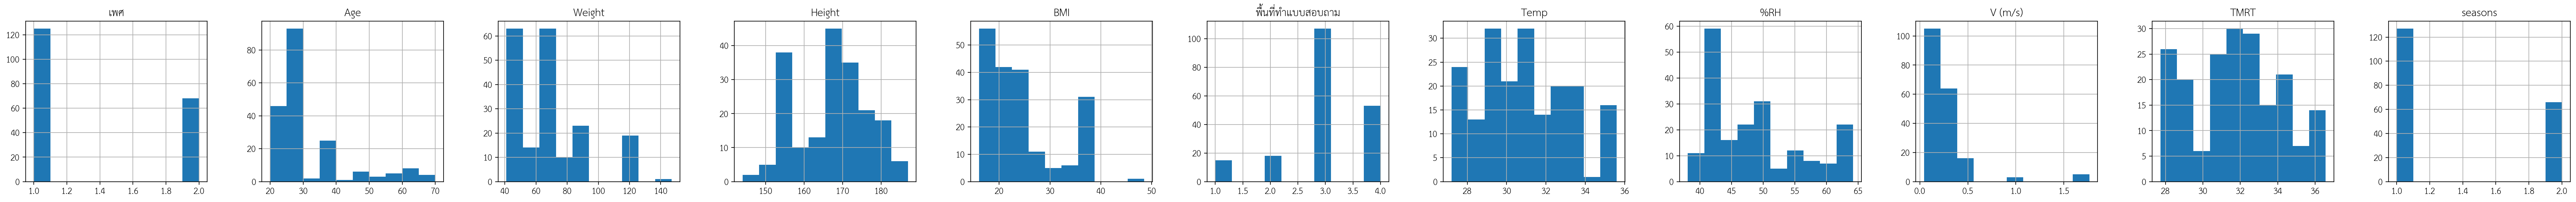

In [29]:
data[cols].hist(layout=(1, len(cols)), figsize=(5 * len(cols), 3.5));

In [89]:
data.corr()

<ipython-input-89-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


No       เพศ       Age    Weight    Height  \
No                      1.000000  0.315777  0.374334 -0.238190 -0.228217   
เพศ                     0.315777  1.000000  0.214785 -0.183751 -0.822110   
Age                     0.374334  0.214785  1.000000 -0.073203 -0.241685   
Weight                 -0.238190 -0.183751 -0.073203  1.000000  0.435320   
Height                 -0.228217 -0.822110 -0.241685  0.435320  1.000000   
BMI                    -0.181233  0.153896 -0.000254  0.902318  0.021613   
พื้นที่ทำแบบสอบถาม      0.202498  0.121687  0.336485 -0.004725 -0.073794   
Temp                    0.795272  0.306044  0.430778 -0.159710 -0.219840   
Globe temp              0.727556  0.295660  0.362495 -0.163418 -0.224340   
%RH                     0.572413  0.362476  0.465773 -0.185852 -0.267454   
V (m/s)                -0.062186 -0.029955 -0.014375  0.007452  0.010415   
Thermal_acceptance      0.378392  0.160262  0.017974 -0.182847 -0.082349   
Thermal_sensation_Vote  0.546787  0.119154  0.140879 -0.131474 -0.027683   
อุณหภูมิ                0.560951  0.221458  0.343074 -0.073053 -0.128559   
ความชื้น                0.350684  0.042663  0.117924 -0.177064 -0.035144   
กระแสลม                -0.024361  0.099199 -0.101031  0.023103 -0.049047   
ความแรงของแสงแดด        0.503362  0.291650  0.402917 -0.200590 -0.223548   
เหงื่อบริเวณผิวหนัง     0.597857  0.202712  0.349738 -0.118839 -0.132877   
ความร้อน               -0.269759  0.064787 -0.054615  0.201544 -0.049925   
ความชื้น.1              0.116327  0.156628  0.022939 -0.052790 -0.096299   
กระแสลม.1               0.233704  0.033309 -0.000470 -0.039278 -0.001765   
แสงแดด                 -0.257172 -0.165979 -0.176629  0.102273  0.071417   
เหงื่อบริเวณผิวหนัง.1  -0.367284 -0.123698 -0.133049 -0.129440 -0.028963   
TMRT                    0.694301  0.284155  0.338733 -0.160025 -0.219627   
Clo                          NaN       NaN       NaN       NaN       NaN   
Met                          NaN       NaN       NaN       NaN       NaN   
seasons                 0.821643  0.360037  0.533766 -0.189423 -0.244442   

                             BMI  พื้นที่ทำแบบสอบถาม      Temp  Globe temp  \
No                     -0.181233            0.202498  0.795272    0.727556   
เพศ                     0.153896            0.121687  0.306044    0.295660   
Age                    -0.000254            0.336485  0.430778    0.362495   
Weight                  0.902318           -0.004725 -0.159710   -0.163418   
Height                  0.021613           -0.073794 -0.219840   -0.224340   
BMI                     1.000000            0.014273 -0.095135   -0.091908   
พื้นที่ทำแบบสอบถาม      0.014273            1.000000  0.232715    0.214531   
Temp                   -0.095135            0.232715  1.000000    0.945751   
Globe temp             -0.091908            0.214531  0.945751    1.000000   
%RH                    -0.097345            0.406311  0.421476    0.320776   
V (m/s)                -0.000359            0.028923 -0.207553   -0.238458   
Thermal_acceptance     -0.173788           -0.233261  0.419520    0.434755   
Thermal_sensation_Vote -0.147886            0.012628  0.635272    0.641370   
อุณหภูมิ               -0.051430            0.186195  0.730012    0.717120   
ความชื้น               -0.208238            0.139053  0.394400    0.347984   
กระแสลม                 0.036211            0.026621  0.036710    0.063929   
ความแรงของแสงแดด       -0.141337            0.147398  0.708836    0.734333   
เหงื่อบริเวณผิวหนัง    -0.098333            0.056382  0.741997    0.723730   
ความร้อน                0.256826           -0.095911 -0.324496   -0.351213   
ความชื้น.1             -0.008517            0.028434 -0.004008   -0.022366   
กระแสลม.1              -0.034317           -0.060257  0.163056    0.144774   
แสงแดด                  0.078835           -0.101298 -0.500927   -0.554210   
เหงื่อบริเวณผิวหนัง.1  -0.124111           -0.110185 -0.400809   -0.436655   
TMRT                   -0.089

##ใช้ seabon corr มา plot เพื่อดูความสัมพันธ์
##- สีเขียวมีความสัมพันธ์ possitive กันสูง
##- สีแดงมีความสัมพันธ์ negative กันสูง (ตรงกันข้าม)

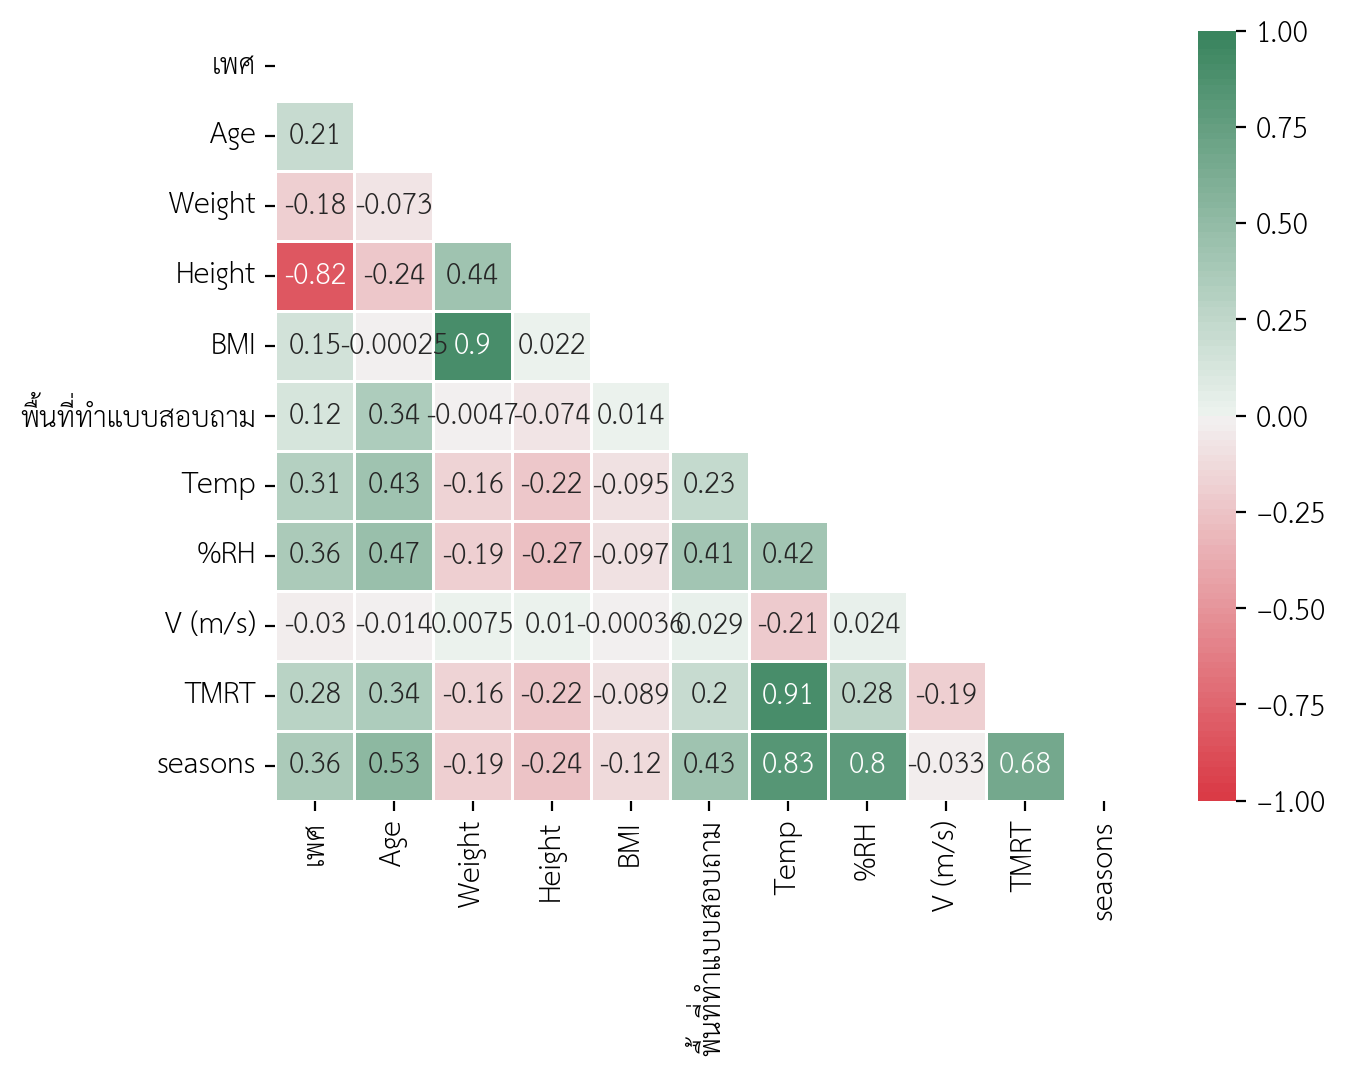

In [31]:
dcorr=data[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

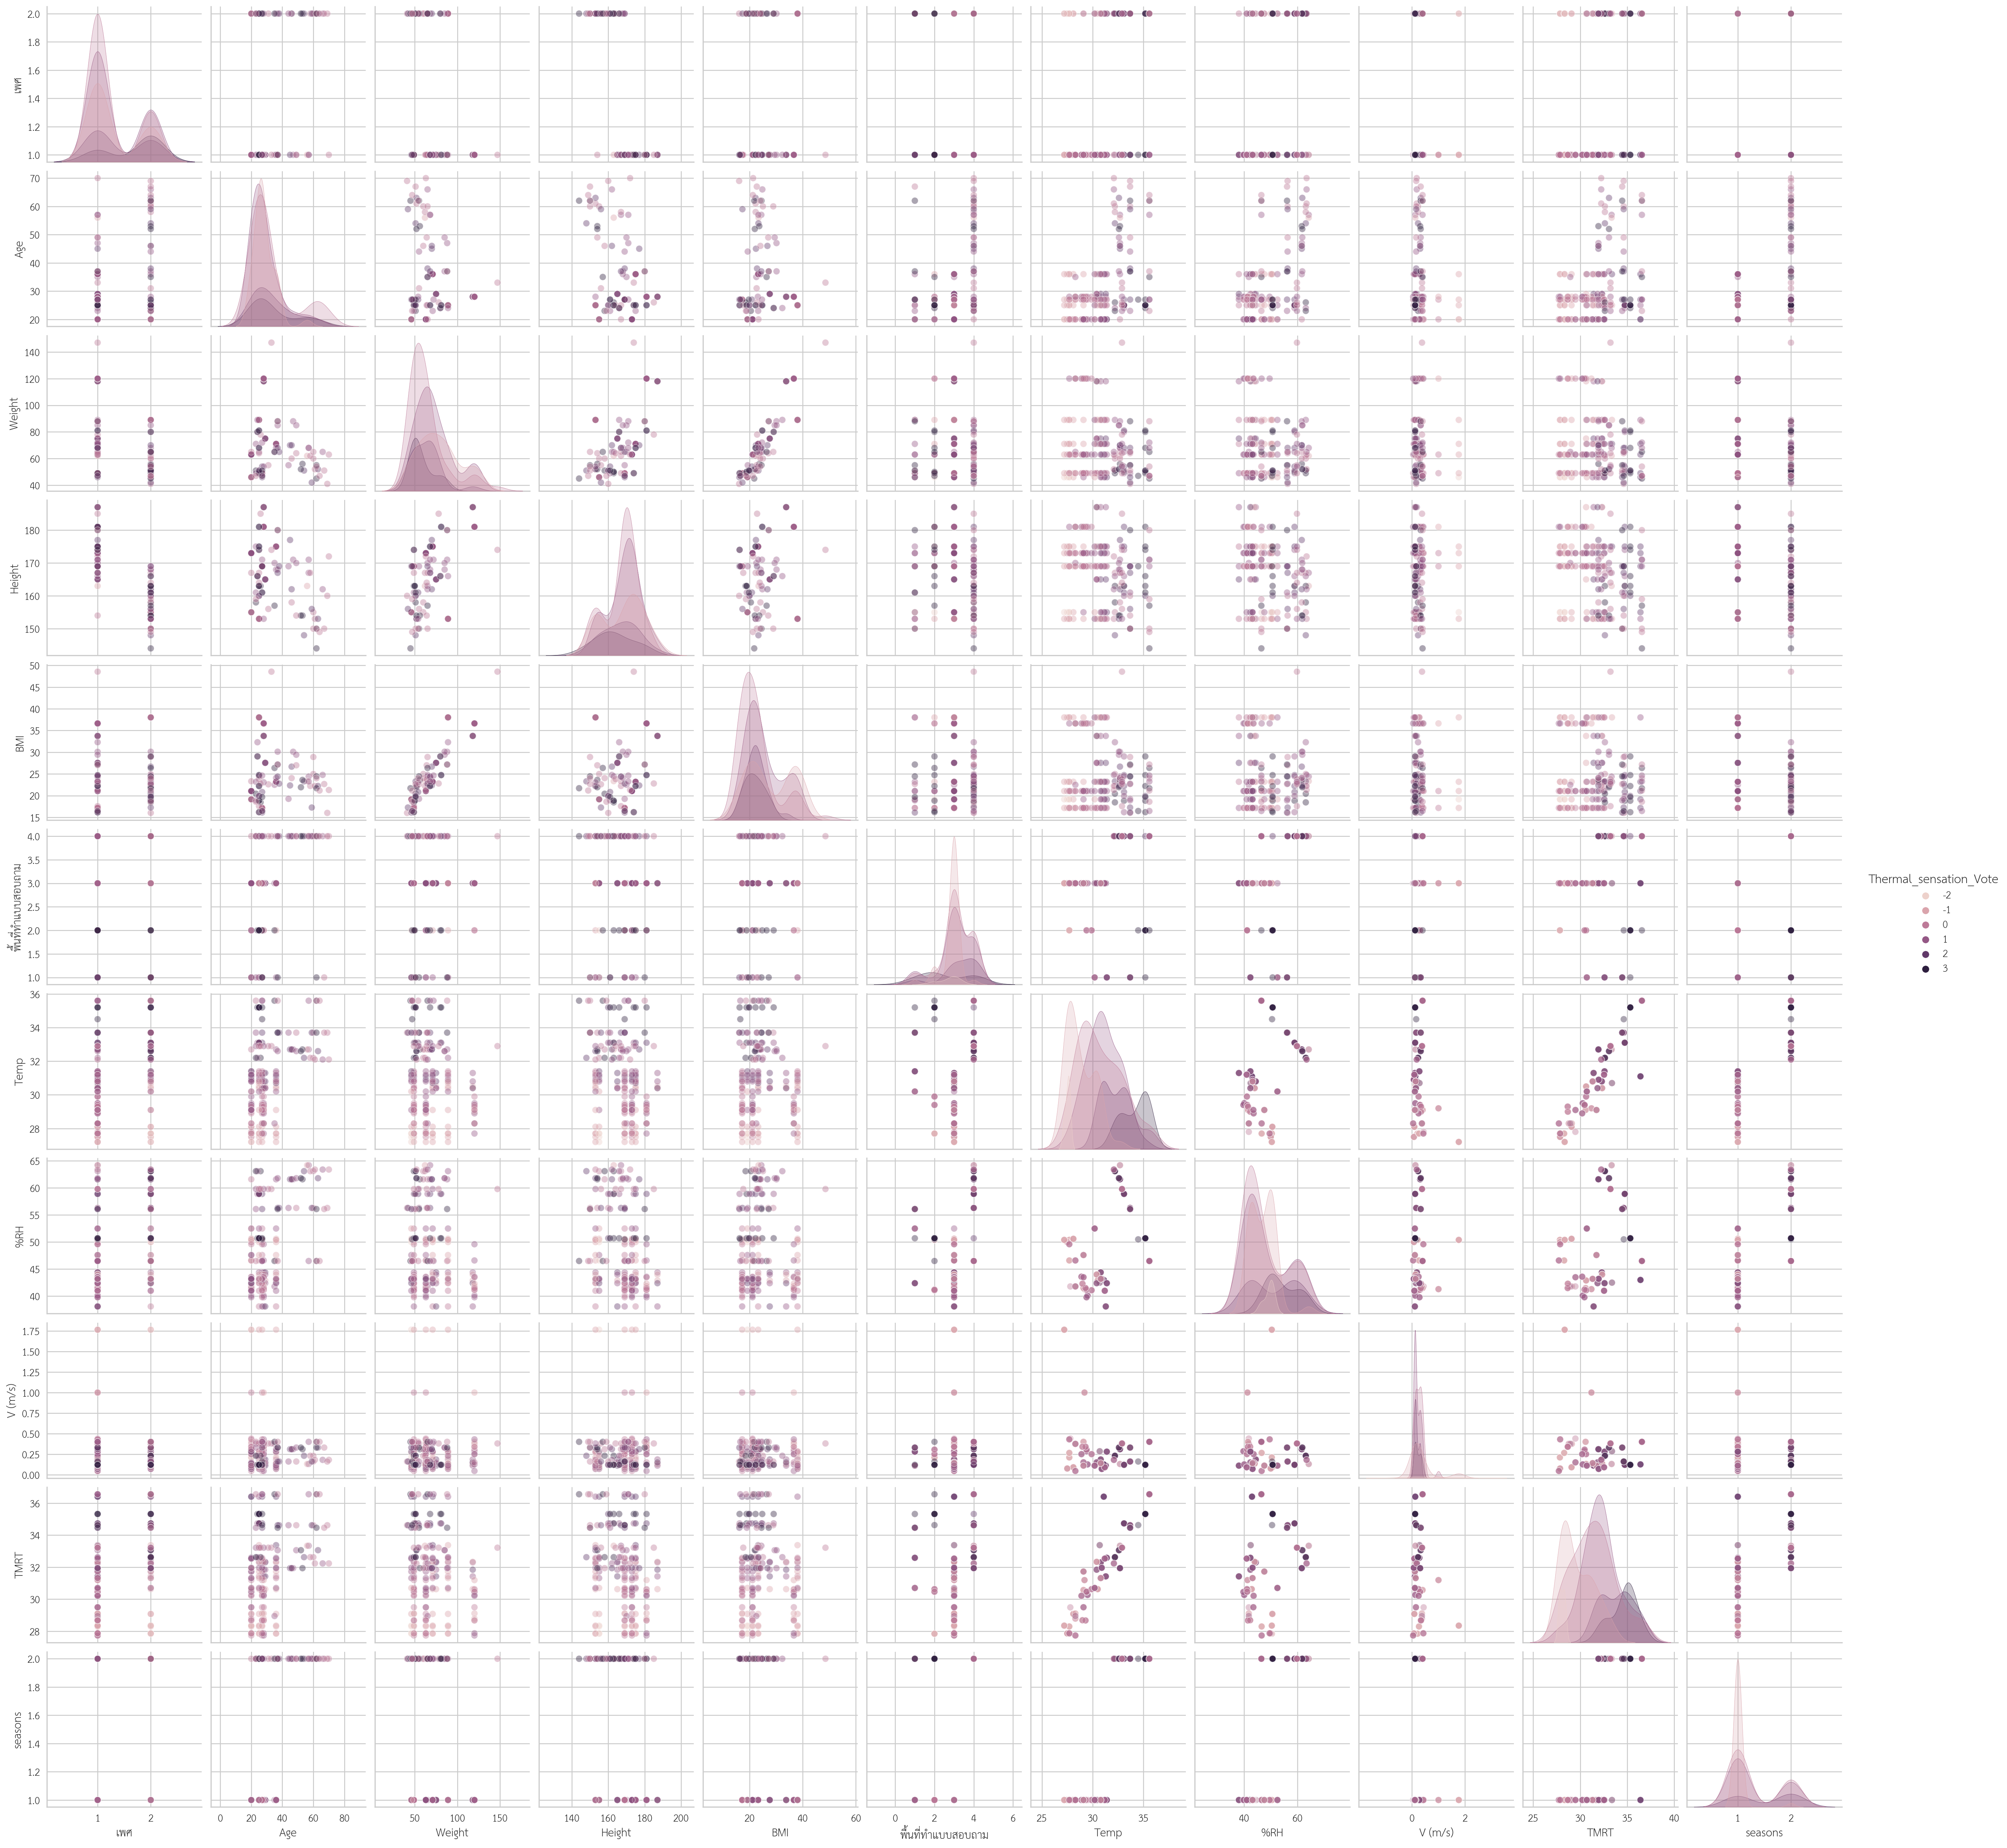

In [90]:
sns.pairplot(data, vars=cols,
             hue='Thermal_sensation_Vote',

             plot_kws={'alpha': .4});

In [ ]:
#markers=['o', 'D', '+'],

## PCA

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score

In [34]:
data[cols]

เพศ  Age  Weight  Height        BMI  พื้นที่ทำแบบสอบถาม  Temp   %RH  \
0      1   27    49.0   169.0  17.156262                   3  30.5  42.9   
1      1   36    71.0   175.0  23.183673                   3  30.5  42.9   
2      2   25    89.0   153.0  38.019565                   3  30.5  42.9   
3      1   29    75.0   165.0  27.548209                   3  30.5  42.9   
4      1   28   118.0   187.0  33.744173                   3  30.5  42.9   
..   ...  ...     ...     ...        ...                 ...   ...   ...   
188    1   37    88.0   180.0  27.160494                   4  35.6  46.5   
189    2   23    47.0   159.0  18.591037                   4  35.6  46.5   
190    1   27    47.0   169.0  16.456006                   4  35.6  46.5   
191    1   57    68.0   171.0  23.255019                   4  35.6  46.5   
192    2   64    47.0   149.0  21.170218                   4  35.6  46.5   

     V (m/s)       TMRT  seasons  
0       0.13  30.628551        1  
1       0.13  30.628551        1  
2       0.13  30.628551        1  
3       0.13  30.628551        1  
4       0.13  30.628551        1  
..       ...        ...      ...  
188     0.40  36.559615        2  
189     0.40  36.559615        2  
190     0.40  36.559615        2  
191     0.40  36.559615        2  
192     0.40  36.559615        2  

[193 rows x 11 columns]

# StandardScaler (z-score)
$z=\frac{x_i-\bar{x}}{sd}$

In [35]:
X=data[cols]
scaler = StandardScaler()
X_t=scaler.fit_transform(X)

In [36]:
X_t

array([[-0.73756356, -0.31211946, -0.87883701, ..., -0.47535064,
        -0.46269922, -0.72089184],
       [-0.73756356,  0.4429662 ,  0.11069944, ..., -0.47535064,
        -0.46269922, -0.72089184],
       [ 1.35581536, -0.47991627,  0.92032017, ..., -0.47535064,
        -0.46269922, -0.72089184],
       ...,
       [-0.73756356, -0.31211946, -0.96879487, ...,  0.47316638,
         1.92626178,  1.38717065],
       [-0.73756356,  2.20483273, -0.02423735, ...,  0.47316638,
         1.92626178,  1.38717065],
       [ 1.35581536,  2.79212157, -0.96879487, ...,  0.47316638,
         1.92626178,  1.38717065]])

In [37]:
scaler.mean_

array([  1.35233161,  30.72020725,  68.5388601 , 167.33160622,
        24.36451109,   3.02590674,  30.89533679,  48.78082902,
         0.26531088,  31.77729255,   1.34196891])

In [38]:
data[cols].mean()

เพศ                     1.352332
Age                    30.720207
Weight                 68.538860
Height                167.331606
BMI                    24.364511
พื้นที่ทำแบบสอบถาม      3.025907
Temp                   30.895337
%RH                    48.780829
V (m/s)                 0.265311
TMRT                   31.777293
seasons                 1.341969
dtype: float64

In [39]:
scaler.var_

array([2.28194045e-01, 1.42066794e+02, 4.94289941e+02, 9.39211254e+01,
       4.99963603e+01, 6.78085318e-01, 5.30966737e+00, 5.58305651e+01,
       8.10284008e-02, 6.16378001e+00, 2.25026175e-01])

In [40]:
np.sqrt(scaler.var_)

array([ 0.4776966 , 11.91917756, 22.23263234,  9.69129121,  7.07081044,
        0.82345936,  2.30427155,  7.47198535,  0.28465488,  2.48269612,
        0.47436924])

In [41]:
X_t[:5].round(4)

array([[-0.7376, -0.3121, -0.8788,  0.1722, -1.0194, -0.0315, -0.1716,
        -0.7871, -0.4754, -0.4627, -0.7209],
       [-0.7376,  0.443 ,  0.1107,  0.7913, -0.167 , -0.0315, -0.1716,
        -0.7871, -0.4754, -0.4627, -0.7209],
       [ 1.3558, -0.4799,  0.9203, -1.4788,  1.9312, -0.0315, -0.1716,
        -0.7871, -0.4754, -0.4627, -0.7209],
       [-0.7376, -0.1443,  0.2906, -0.2406,  0.4503, -0.0315, -0.1716,
        -0.7871, -0.4754, -0.4627, -0.7209],
       [-0.7376, -0.2282,  2.2247,  2.0295,  1.3265, -0.0315, -0.1716,
        -0.7871, -0.4754, -0.4627, -0.7209]])

In [42]:
data1=pd.DataFrame(X_t.round(4), columns=[f'z_{c}' for c in cols])
data1

z_เพศ   z_Age  z_Weight  z_Height   z_BMI  z_พื้นที่ทำแบบสอบถาม  z_Temp  \
0   -0.7376 -0.3121   -0.8788    0.1722 -1.0194               -0.0315 -0.1716   
1   -0.7376  0.4430    0.1107    0.7913 -0.1670               -0.0315 -0.1716   
2    1.3558 -0.4799    0.9203   -1.4788  1.9312               -0.0315 -0.1716   
3   -0.7376 -0.1443    0.2906   -0.2406  0.4503               -0.0315 -0.1716   
4   -0.7376 -0.2282    2.2247    2.0295  1.3265               -0.0315 -0.1716   
..      ...     ...       ...       ...     ...                   ...     ...   
188 -0.7376  0.5269    0.8753    1.3072  0.3954                1.1829  2.0417   
189  1.3558 -0.6477   -0.9688   -0.8597 -0.8165                1.1829  2.0417   
190 -0.7376 -0.3121   -0.9688    0.1722 -1.1185                1.1829  2.0417   
191 -0.7376  2.2048   -0.0242    0.3785 -0.1569                1.1829  2.0417   
192  1.3558  2.7921   -0.9688   -1.8916 -0.4518                1.1829  2.0417   

      z_%RH  z_V (m/s)  z_TMRT  z_seasons  
0   -0.7871    -0.4754 -0.4627    -0.7209  
1   -0.7871    -0.4754 -0.4627    -0.7209  
2   -0.7871    -0.4754 -0.4627    -0.7209  
3   -0.7871    -0.4754 -0.4627    -0.7209  
4   -0.7871    -0.4754 -0.4627    -0.7209  
..      ...        ...     ...        ...  
188 -0.3053     0.4732  1.9263     1.3872  
189 -0.3053     0.4732  1.9263     1.3872  
190 -0.3053     0.4732  1.9263     1.3872  
191 -0.3053     0.4732  1.9263     1.3872  
192 -0.3053     0.4732  1.9263     1.3872  

[193 rows x 11 columns]

In [43]:
pd.concat([data[cols], data1], axis='columns')

เพศ  Age  Weight  Height        BMI  พื้นที่ทำแบบสอบถาม  Temp   %RH  \
0      1   27    49.0   169.0  17.156262                   3  30.5  42.9   
1      1   36    71.0   175.0  23.183673                   3  30.5  42.9   
2      2   25    89.0   153.0  38.019565                   3  30.5  42.9   
3      1   29    75.0   165.0  27.548209                   3  30.5  42.9   
4      1   28   118.0   187.0  33.744173                   3  30.5  42.9   
..   ...  ...     ...     ...        ...                 ...   ...   ...   
188    1   37    88.0   180.0  27.160494                   4  35.6  46.5   
189    2   23    47.0   159.0  18.591037                   4  35.6  46.5   
190    1   27    47.0   169.0  16.456006                   4  35.6  46.5   
191    1   57    68.0   171.0  23.255019                   4  35.6  46.5   
192    2   64    47.0   149.0  21.170218                   4  35.6  46.5   

     V (m/s)       TMRT  ...   z_Age  z_Weight  z_Height   z_BMI  \
0       0.13  30.628551  ... -0.3121   -0.8788    0.1722 -1.0194   
1       0.13  30.628551  ...  0.4430    0.1107    0.7913 -0.1670   
2       0.13  30.628551  ... -0.4799    0.9203   -1.4788  1.9312   
3       0.13  30.628551  ... -0.1443    0.2906   -0.2406  0.4503   
4       0.13  30.628551  ... -0.2282    2.2247    2.0295  1.3265   
..       ...        ...  ...     ...       ...       ...     ...   
188     0.40  36.559615  ...  0.5269    0.8753    1.3072  0.3954   
189     0.40  36.559615  ... -0.6477   -0.9688   -0.8597 -0.8165   
190     0.40  36.559615  ... -0.3121   -0.9688    0.1722 -1.1185   
191     0.40  36.559615  ...  2.2048   -0.0242    0.3785 -0.1569   
192     0.40  36.559615  ...  2.7921   -0.9688   -1.8916 -0.4518   

     z_พื้นที่ทำแบบสอบถาม  z_Temp   z_%RH  z_V (m/s)  z_TMRT  z_seasons  
0                 -0.0315 -0.1716 -0.7871    -0.4754 -0.4627    -0.7209  
1                 -0.0315 -0.1716 -0.7871    -0.4754 -0.4627    -0.7209  
2                 -0.0315 -0.1716 -0.7871    -0.4754 -0.4627    -0.7209  
3                 -0.0315 -0.1716 -0.7871    -0.4754 -0.4627    -0.7209  
4                 -0.0315 -0.1716 -0.7871    -0.4754 -0.4627    -0.7209  
..                    ...     ...     ...        ...     ...        ...  
188                1.1829  2.0417 -0.3053     0.4732  1.9263     1.3872  
189                1.1829  2.0417 -0.3053     0.4732  1.9263     1.3872  
190                1.1829  2.0417 -0.3053     0.4732  1.9263     1.3872  
191                1.1829  2.0417 -0.3053     0.4732  1.9263     1.3872  
192                1.1829  2.0417 -0.3053     0.4732  1.9263     1.3872  

[193 rows x 22 columns]

In [44]:
#(data['เพศ']-scaler.mean_[0])/np.sqrt(scaler.var_[0])

0     -0.737564
1     -0.737564
2      1.355815
3     -0.737564
4     -0.737564
         ...   
188   -0.737564
189    1.355815
190   -0.737564
191   -0.737564
192    1.355815
Name: เพศ, Length: 193, dtype: float64

In [45]:
#X_t[:, 0]

array([-0.73756356, -0.73756356,  1.35581536, -0.73756356, -0.73756356,
       -0.73756356,  1.35581536, -0.73756356, -0.73756356, -0.73756356,
       -0.73756356, -0.73756356, -0.73756356, -0.73756356,  1.35581536,
       -0.73756356,  1.35581536, -0.73756356, -0.73756356, -0.73756356,
        1.35581536, -0.73756356, -0.73756356, -0.73756356, -0.73756356,
       -0.73756356,  1.35581536, -0.73756356,  1.35581536, -0.73756356,
       -0.73756356,  1.35581536, -0.73756356,  1.35581536, -0.73756356,
       -0.73756356,  1.35581536,  1.35581536, -0.73756356, -0.73756356,
       -0.73756356, -0.73756356,  1.35581536,  1.35581536, -0.73756356,
        1.35581536, -0.73756356,  1.35581536, -0.73756356, -0.73756356,
       -0.73756356, -0.73756356, -0.73756356, -0.73756356, -0.73756356,
       -0.73756356, -0.73756356, -0.73756356, -0.73756356, -0.73756356,
       -0.73756356, -0.73756356, -0.73756356, -0.73756356, -0.73756356,
       -0.73756356, -0.73756356, -0.73756356, -0.73756356, -0.73

In [46]:
#X_t[:, 0].mean().round(4)

0.0

In [47]:
#np.sqrt(X_t[:, 0].var())

0.9999999999999999

In [49]:
#X_t[:5]

array([[-0.73756356, -0.31211946, -0.87883701,  0.17215392, -1.01943746,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [-0.73756356,  0.4429662 ,  0.11069944,  0.79126647, -0.16700174,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [ 1.35581536, -0.47991627,  0.92032017, -1.47881287,  1.93118655,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [-0.73756356, -0.14432265,  0.29061516, -0.24058778,  0.45025932,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [-0.73756356, -0.22822105,  2.22470912,  2.02949157,  1.32653285,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184]])

In [50]:
X_t.shape

(193, 11)

In [51]:
X_t.shape[1]

11

In [52]:
pca = PCA(n_components=X_t.shape[1])
# pca = PCA(n_components=2)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=11) = [4.03040568 1.89514889 1.53793957 1.26285197 0.83893743 0.63501101
 0.58625208 0.14292603 0.10099872 0.02174364 0.00507666]
explained_variance_ratio (n_components=11) = [0.36450207 0.17139359 0.13908827 0.11420988 0.07587187 0.05742916
 0.0530195  0.01292595 0.00913413 0.00196645 0.00045912]
sum explained_variance_ratio = 1.0


##explained_variance (n_components=11) = eigenvalue ส่ง components 11 ค่า
##explained_variance_ratio (n_components=11) = components แรก อธิบาย var ได้ 36%
##sum explained_variance_ratio = var ratio รวมกันทั้งหมดได้ 1

In [53]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]

    plt.figure(figsize=figsize)

    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')

    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']),
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)


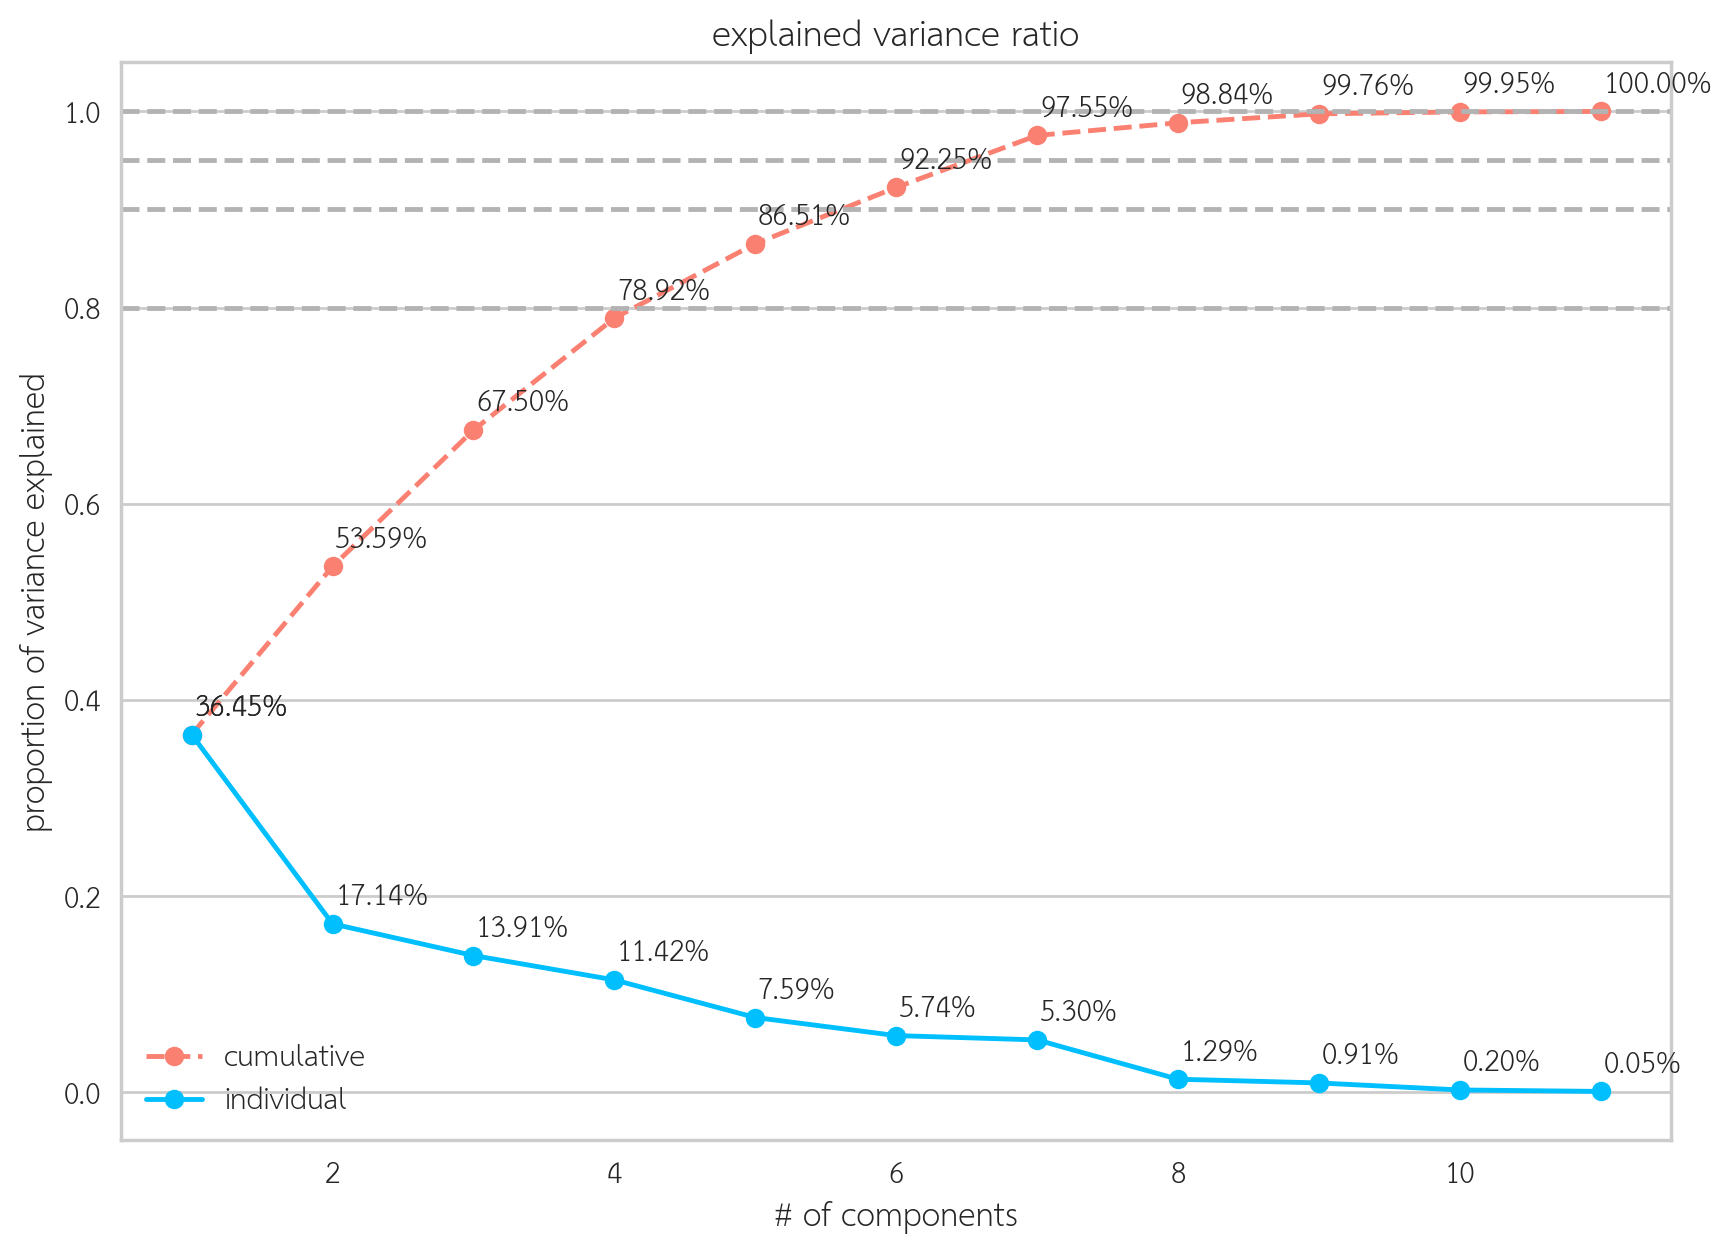

In [93]:
scree_plot(X, 11, True, True)

###เส้นสีฟ้า จุดแรก components แรก อธิบาย var ได้ 36.45%
###เส้นสีฟ้า จุดที่สอง components ที่สอง อธิบาย var ได้ 17.14%
###เส้นสีฟ้า จุดที่สาม components ที่สาม อธิบาย var ได้ 13.91%
###เส้นสีฟ้า จุดที่สี่ components ที่สี่ อธิบาย var ได้ 11.42%
###เส้นสีฟ้า จุดที่ห้า components ที่ห้า อธิบาย var ได้ 7.59%

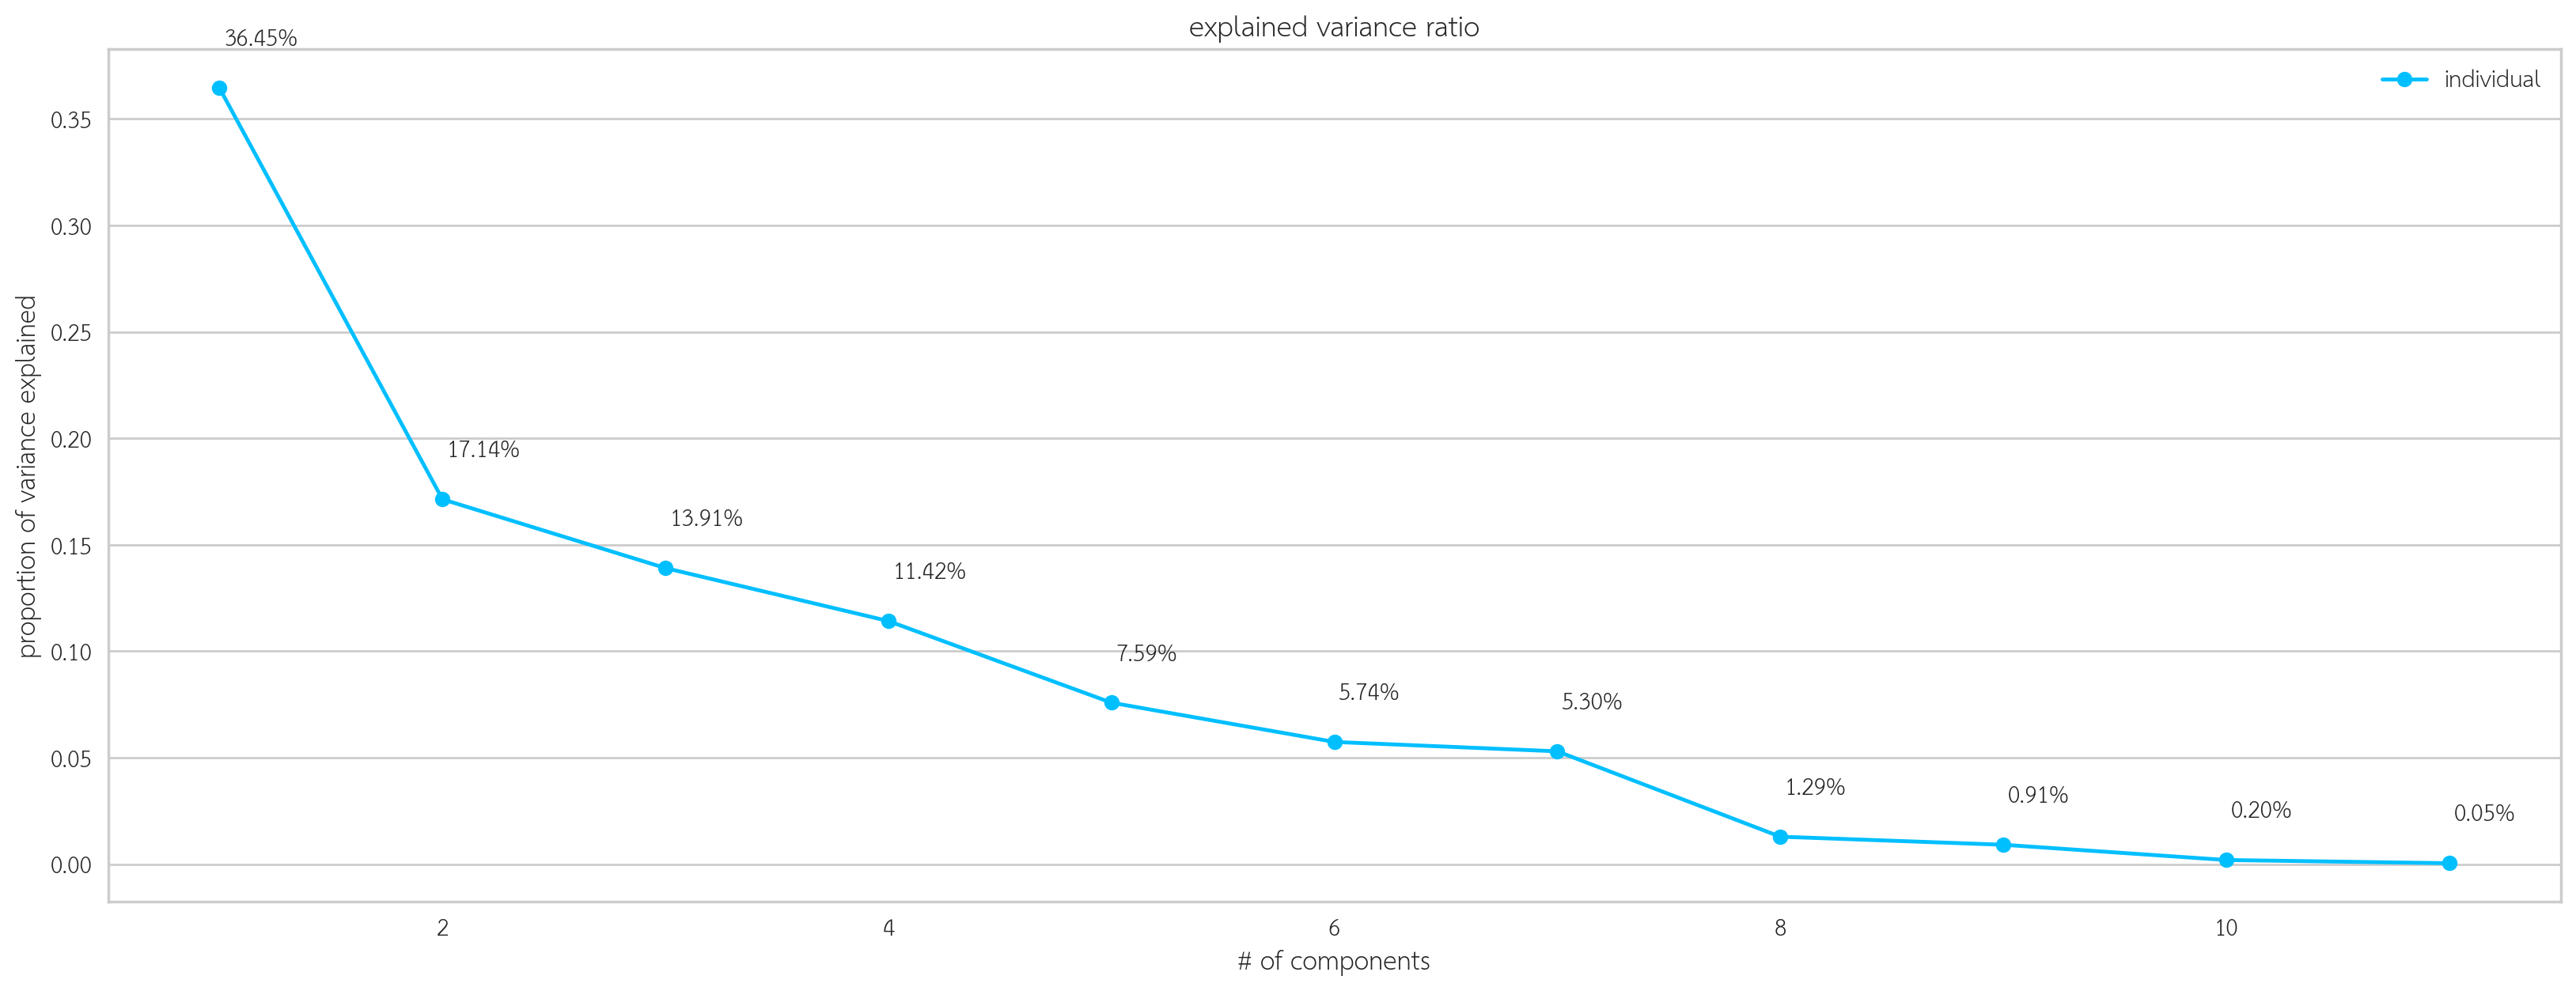

In [94]:
scree_plot(X, 11, False, True, (20, 7))

In [56]:
pca.components_ # Eigenvectors

array([[ 2.86390121e-01,  3.10474245e-01, -1.85884746e-01,
        -2.63637907e-01, -9.66367596e-02,  2.23389634e-01,
         4.17710513e-01,  3.64011391e-01, -5.80879629e-02,
         3.75218631e-01,  4.55123244e-01],
       [-1.11526551e-02,  1.46744748e-01,  6.71222831e-01,
         1.99892999e-01,  6.45911085e-01,  1.77966434e-01,
         1.12144388e-01,  6.50564601e-02, -3.61400437e-02,
         8.82631008e-02,  1.14306306e-01],
       [ 6.11878098e-01, -4.79942023e-02,  2.92556392e-02,
        -6.09643277e-01,  3.16087407e-01, -1.12238112e-01,
        -2.26529427e-01, -8.81086484e-03,  1.22191304e-01,
        -2.08285720e-01, -1.69013078e-01],
       [-1.05294943e-01,  2.24975917e-01, -3.15675741e-02,
         8.25460007e-02, -8.16174350e-02,  4.38922176e-01,
        -3.02999674e-01,  3.59285874e-01,  5.98811811e-01,
        -3.78036659e-01,  9.37653127e-02],
       [-9.22894808e-04, -1.41617737e-01,  5.27379663e-02,
         4.08089620e-02,  3.78921959e-02, -4.26517292e-01,
  

In [57]:
dpc=pd.DataFrame(pca.components_.T,
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

##มี components อยู่ 11 components

<Axes: >

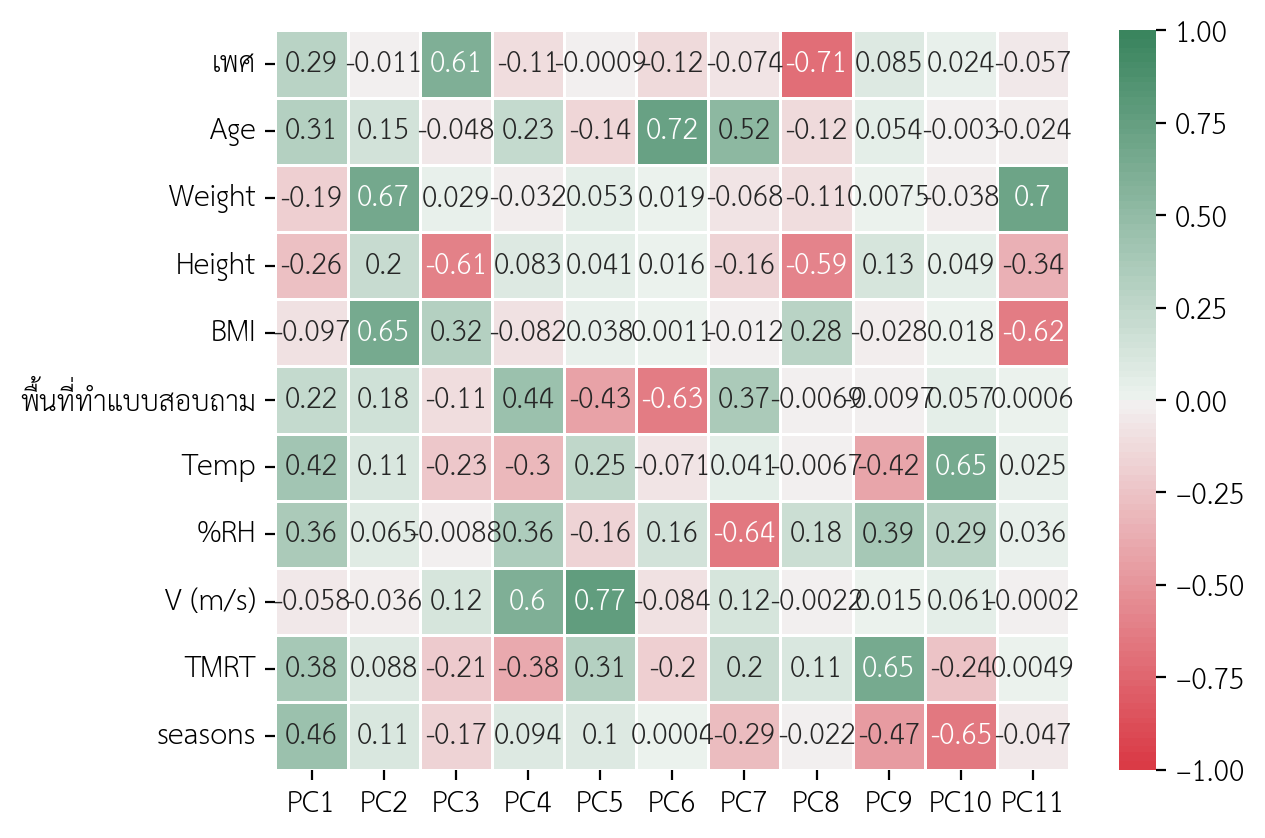

In [58]:
sns.heatmap(dpc, cmap=sns.diverging_palette(10, 145, n=100), linewidths=1,
            center=0, annot=True, vmin=-1, vmax=1)

In [59]:
X_t[:5]

array([[-0.73756356, -0.31211946, -0.87883701,  0.17215392, -1.01943746,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [-0.73756356,  0.4429662 ,  0.11069944,  0.79126647, -0.16700174,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [ 1.35581536, -0.47991627,  0.92032017, -1.47881287,  1.93118655,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [-0.73756356, -0.14432265,  0.29061516, -0.24058778,  0.45025932,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184],
       [-0.73756356, -0.22822105,  2.22470912,  2.02949157,  1.32653285,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184]])

In [60]:
X_t.shape

(193, 11)

In [61]:
pca.components_.T.shape

(11, 11)

In [62]:
# multiply matrix #คูณ matrix
np.dot(X_t, pca.components_.T)[:5] # equals pca.transform(X_t)

array([[-0.93092923, -1.43362967, -0.67975309, -0.2893236 , -0.5199546 ,
        -0.11333055,  0.48044866,  0.09062771, -0.23761178,  0.214127  ,
         0.00485797],
       [-1.12603248,  0.01572858, -0.79503691, -0.16915313, -0.51713598,
         0.45945851,  0.69796523, -0.2288847 , -0.13110776,  0.2203044 ,
        -0.05814723],
       [-0.56781997,  1.30185972,  2.60098429, -0.98139416, -0.35880829,
        -0.46897013,  0.34899616,  0.24266484, -0.35441912,  0.1686031 ,
        -0.11228298],
       [-1.12942834,  0.24274589,  0.06258455, -0.44251319, -0.44319659,
         0.02528841,  0.53888222,  0.60423386, -0.31488235,  0.17564136,
         0.05181204],
       [-2.1981544 ,  2.54841002, -0.98376524, -0.40657619, -0.2034714 ,
         0.03919958, -0.01724379, -0.68455746, -0.02865029,  0.23007279,
         0.09255072]])

In [63]:
pca.transform(X_t)[:5]

array([[-0.93092923, -1.43362967, -0.67975309, -0.2893236 , -0.5199546 ,
        -0.11333055,  0.48044866,  0.09062771, -0.23761178,  0.214127  ,
         0.00485797],
       [-1.12603248,  0.01572858, -0.79503691, -0.16915313, -0.51713598,
         0.45945851,  0.69796523, -0.2288847 , -0.13110776,  0.2203044 ,
        -0.05814723],
       [-0.56781997,  1.30185972,  2.60098429, -0.98139416, -0.35880829,
        -0.46897013,  0.34899616,  0.24266484, -0.35441912,  0.1686031 ,
        -0.11228298],
       [-1.12942834,  0.24274589,  0.06258455, -0.44251319, -0.44319659,
         0.02528841,  0.53888222,  0.60423386, -0.31488235,  0.17564136,
         0.05181204],
       [-2.1981544 ,  2.54841002, -0.98376524, -0.40657619, -0.2034714 ,
         0.03919958, -0.01724379, -0.68455746, -0.02865029,  0.23007279,
         0.09255072]])

In [64]:
data.head()

No     วันที่  เพศ  Age  Weight  Height        BMI  พื้นที่ทำแบบสอบถาม  \
0   1 2022-12-28    1   27    49.0   169.0  17.156262                   3   
1   2 2022-12-28    1   36    71.0   175.0  23.183673                   3   
2   3 2022-12-28    2   25    89.0   153.0  38.019565                   3   
3   4 2022-12-28    1   29    75.0   165.0  27.548209                   3   
4   5 2022-12-28    1   28   118.0   187.0  33.744173                   3   

       เวลา  Temp  ...  เหงื่อบริเวณผิวหนัง  ความร้อน  ความชื้น.1  กระแสลม.1  \
0  10:55 AM  30.5  ...                    2         0          -1          0   
1  10:55 AM  30.5  ...                    1         0           0          1   
2  10:55 AM  30.5  ...                    1         0           0          0   
3  10:55 AM  30.5  ...                    2        -1           0          0   
4  10:55 AM  30.5  ...                    0        -1          -1          0   

   แสงแดด  เหงื่อบริเวณผิวหนัง.1       TMRT   Clo  Met  seasons  
0      -1                      0  30.628551  0.55  1.2        1  
1      -1                      0  30.628551  0.55  1.2        1  
2       0                      0  30.628551  0.55  1.2        1  
3      -1                      1  30.628551  0.55  1.2        1  
4      -1                      0  30.628551  0.55  1.2        1  

[5 rows x 29 columns]

In [65]:
X_t[:1]

array([[-0.73756356, -0.31211946, -0.87883701,  0.17215392, -1.01943746,
        -0.03146086, -0.17156693, -0.78705039, -0.47535064, -0.46269922,
        -0.72089184]])

In [66]:
pca.components_[:1]

array([[ 0.28639012,  0.31047424, -0.18588475, -0.26363791, -0.09663676,
         0.22338963,  0.41771051,  0.36401139, -0.05808796,  0.37521863,
         0.45512324]])

In [67]:
np.sum(X_t[:1] * pca.components_[:1])

-0.9309292349944851

In [68]:
pca.n_components_

11

In [97]:
data[cols][:5]

เพศ  Age  Weight  Height        BMI  พื้นที่ทำแบบสอบถาม  Temp   %RH  \
0    1   27    49.0   169.0  17.156262                   3  30.5  42.9   
1    1   36    71.0   175.0  23.183673                   3  30.5  42.9   
2    2   25    89.0   153.0  38.019565                   3  30.5  42.9   
3    1   29    75.0   165.0  27.548209                   3  30.5  42.9   
4    1   28   118.0   187.0  33.744173                   3  30.5  42.9   

   V (m/s)       TMRT  seasons  
0     0.13  30.628551        1  
1     0.13  30.628551        1  
2     0.13  30.628551        1  
3     0.13  30.628551        1  
4     0.13  30.628551        1

In [95]:
dd=pd.concat([pd.DataFrame(pca.transform(X_t),
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]),
              data[['Thermal_sensation_Vote']]], axis = 'columns')
dd.head()

PC1       PC2       PC3  Thermal_sensation_Vote
0 -0.930929 -1.433630 -0.679753                       0
1 -1.126032  0.015729 -0.795037                      -1
2 -0.567820  1.301860  2.600984                      -1
3 -1.129428  0.242746  0.062585                      -1
4 -2.198154  2.548410 -0.983765                      -1

### Plot PC1 and PC2 and PC3

In [98]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [4.03040568 1.89514889 1.53793957]
explained_variance_ratio (n_components=3) = [0.36450207 0.17139359 0.13908827]
sum explained_variance_ratio = 0.6749839260022984


##explained_variance (n_components=11) = eigenvalue ส่ง components 3 ค่า
##explained_variance_ratio (n_components=11) = components แรก อธิบาย var ได้ 36%
##sum explained_variance_ratio = var ratio รวมกันทั้งหมดได้ 0.67

In [99]:
X_pca.shape

(193, 3)

In [100]:
X_pca[:5]

array([[-0.93092923, -1.43362967, -0.67975309],
       [-1.12603248,  0.01572858, -0.79503691],
       [-0.56781997,  1.30185972,  2.60098429],
       [-1.12942834,  0.24274589,  0.06258455],
       [-2.1981544 ,  2.54841002, -0.98376524]])

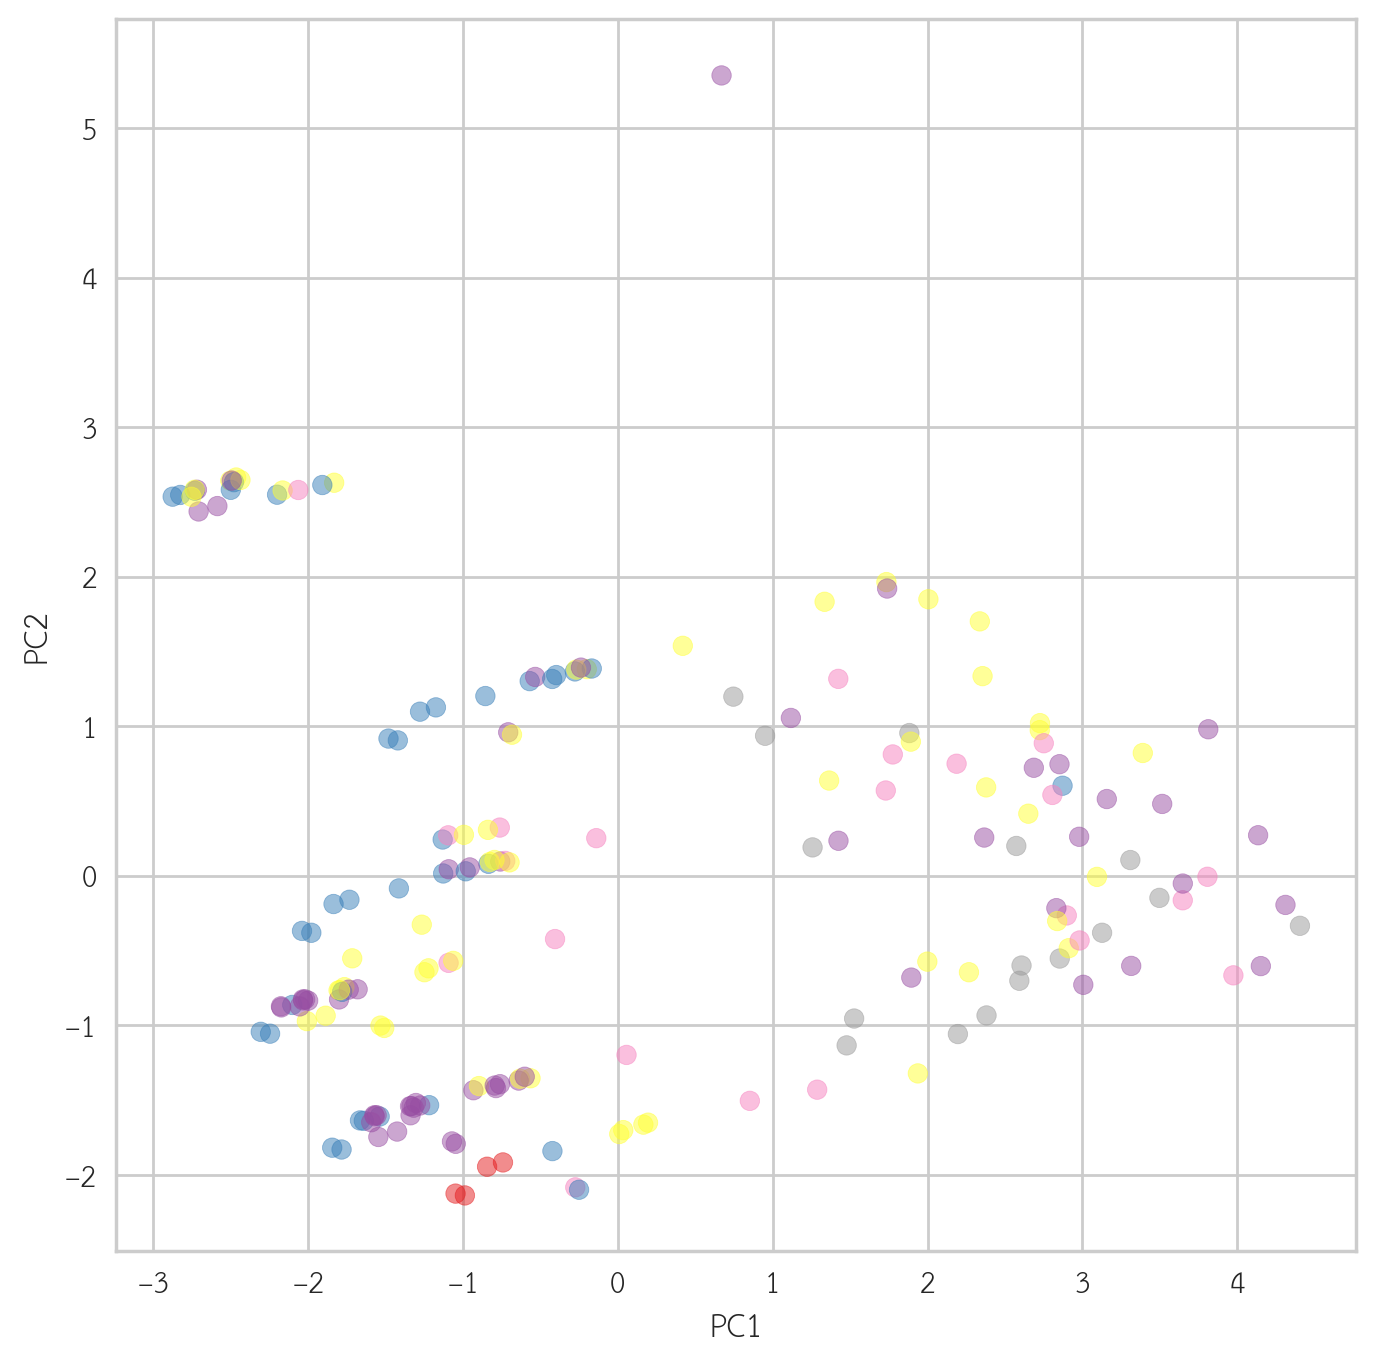

In [109]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, cmap='Set1', c=data.Thermal_sensation_Vote.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

## biplot using yellowbrick package

In [102]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

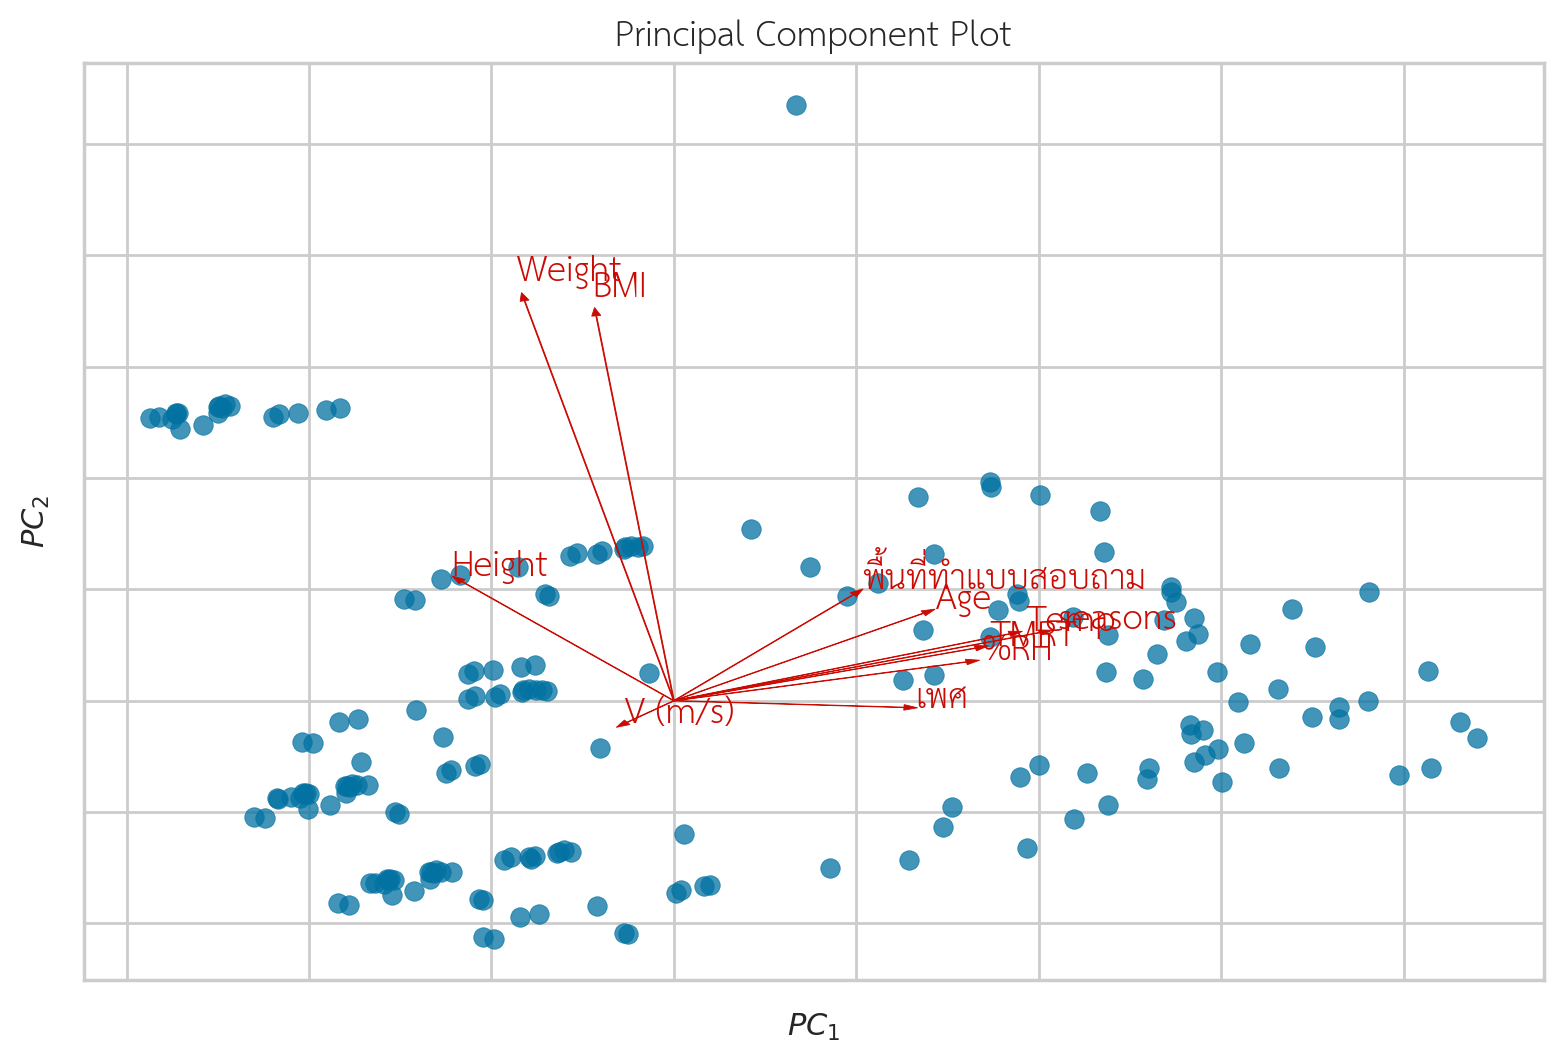

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [103]:
# pip install yellowbrick
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

##ประโยชน์ของ pca คือ สามารถ visualize data ได้ง่ายขึ้น

### พื้นที่ทำแบบสอบถาม Age seasons มีความสัมพันธ์ในทิศทางเดียวกัน

In [104]:
dpc=pd.DataFrame(pca.components_.T,
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

In [108]:
data[cols].corr()

เพศ       Age    Weight    Height       BMI  \
เพศ                 1.000000  0.214785 -0.183751 -0.822110  0.153896   
Age                 0.214785  1.000000 -0.073203 -0.241685 -0.000254   
Weight             -0.183751 -0.073203  1.000000  0.435320  0.902318   
Height             -0.822110 -0.241685  0.435320  1.000000  0.021613   
BMI                 0.153896 -0.000254  0.902318  0.021613  1.000000   
พื้นที่ทำแบบสอบถาม  0.121687  0.336485 -0.004725 -0.073794  0.014273   
Temp                0.306044  0.430778 -0.159710 -0.219840 -0.095135   
%RH                 0.362476  0.465773 -0.185852 -0.267454 -0.097345   
V (m/s)            -0.029955 -0.014375  0.007452  0.010415 -0.000359   
TMRT                0.284155  0.338733 -0.160025 -0.219627 -0.089091   
seasons             0.360037  0.533766 -0.189423 -0.244442 -0.123061   

                    พื้นที่ทำแบบสอบถาม      Temp       %RH   V (m/s)  \
เพศ                           0.121687  0.306044  0.362476 -0.029955   
Age                           0.336485  0.430778  0.465773 -0.014375   
Weight                       -0.004725 -0.159710 -0.185852  0.007452   
Height                       -0.073794 -0.219840 -0.267454  0.010415   
BMI                           0.014273 -0.095135 -0.097345 -0.000359   
พื้นที่ทำแบบสอบถาม            1.000000  0.232715  0.406311  0.028923   
Temp                          0.232715  1.000000  0.421476 -0.207553   
%RH                           0.406311  0.421476  1.000000  0.023862   
V (m/s)                       0.028923 -0.207553  0.023862  1.000000   
TMRT                          0.201646  0.911245  0.279872 -0.189957   
seasons                       0.428306  0.833830  0.795757 -0.032636   

                        TMRT   seasons  
เพศ                 0.284155  0.360037  
Age                 0.338733  0.533766  
Weight             -0.160025 -0.189423  
Height             -0.219627 -0.244442  
BMI                -0.089091 -0.123061  
พื้นที่ทำแบบสอบถาม  0.201646  0.428306  
Temp                0.911245  0.833830  
%RH                 0.279872  0.795757  
V (m/s)            -0.189957 -0.032636  
TMRT                1.000000  0.676368  
seasons             0.676368  1.000000

### Plot 3D (PC1, PC2, PC3)

In [82]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [83]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [4.03040568 1.89514889 1.53793957]
explained_variance_ratio (n_components=3) = [0.36450207 0.17139359 0.13908827]
sum explained_variance_ratio = 0.6749839260022984


In [84]:
X_pca[:5]

array([[-0.93092923, -1.43362967, -0.67975309],
       [-1.12603248,  0.01572858, -0.79503691],
       [-0.56781997,  1.30185972,  2.60098429],
       [-1.12942834,  0.24274589,  0.06258455],
       [-2.1981544 ,  2.54841002, -0.98376524]])

In [ ]:
# switch to interactive matplotlib
%matplotlib qt
%pylab qt

In [86]:
# switch back to inline mode
%matplotlib inline

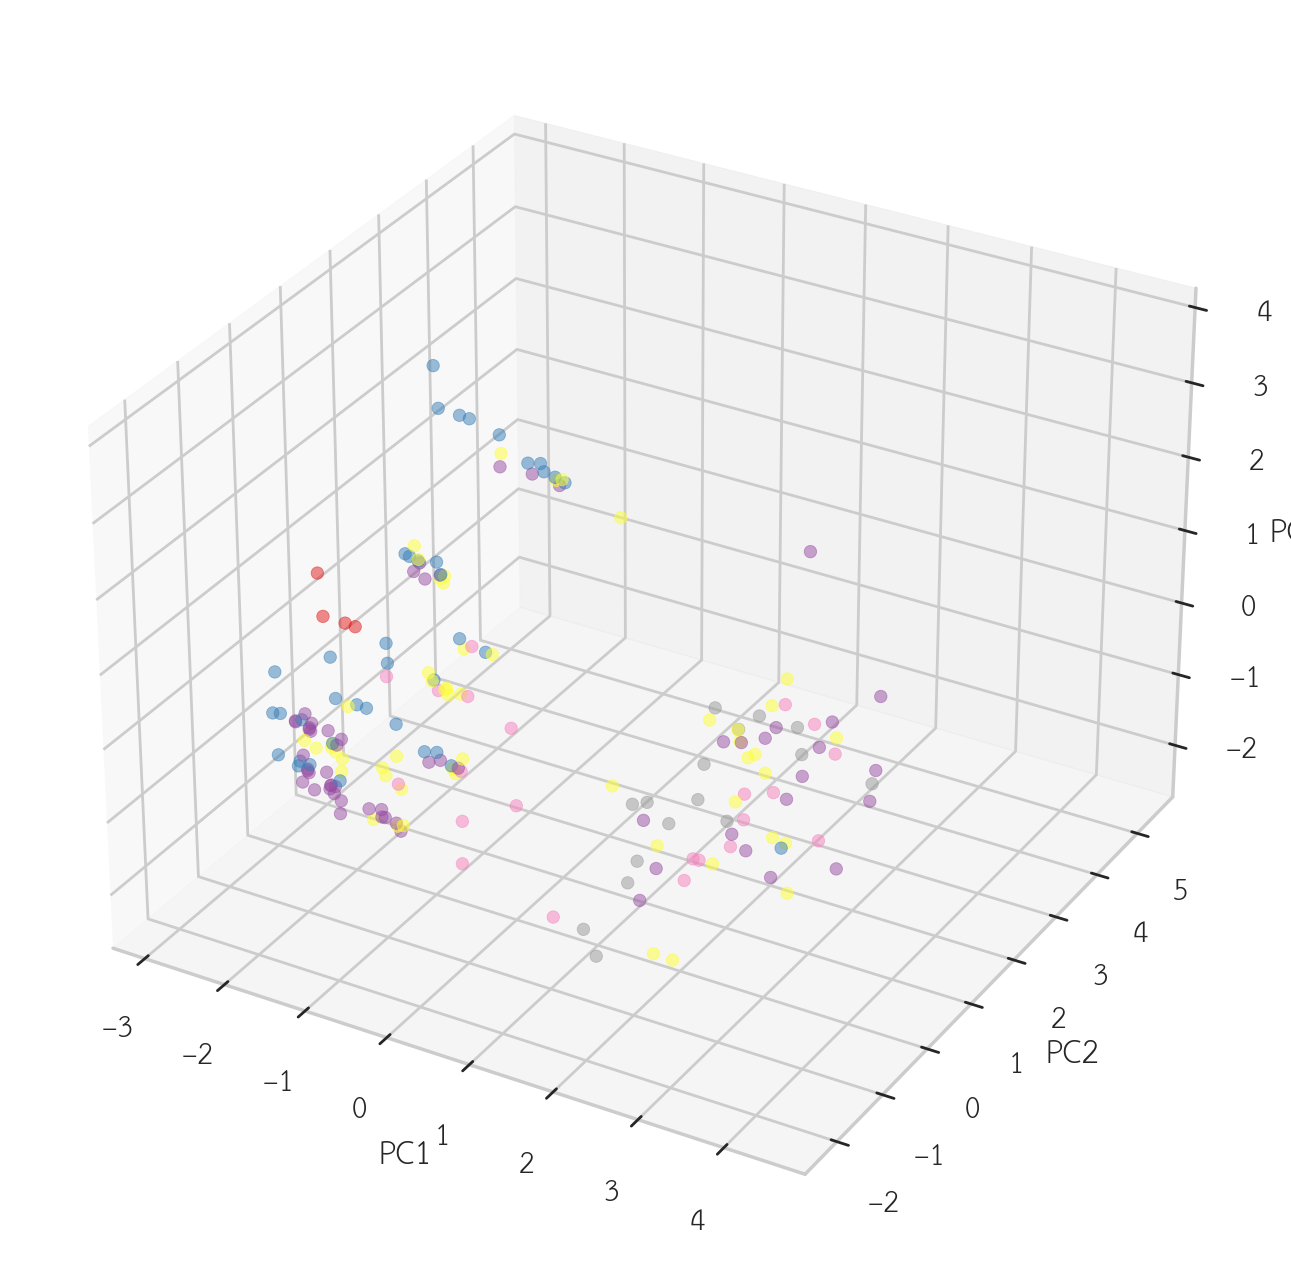

In [87]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.5, cmap='Set1', c=data.Thermal_sensation_Vote.astype('category').cat.codes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

##plot data เพื่อดูผ่านรูปแบบ 3 มิติ

---